In [56]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats

# Estadística 
import scipy

In [49]:
df = pd.read_csv(r'C:\Users\nuria\Proyecto_EDA\data\raw\Student Depression Dataset.csv')
df.head(2)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0


In [50]:
df.set_index('id')

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,
2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


# 1. Analisis univariado

1. Variables Numéricas:
   * Estadísticas descriptivas (media, mediana, desviación estándar)
   * Histogramas y density plots
   * Box plots
   * Pruebas de normalidad (Shapiro-Wilk, QQ-plots)

2. Variables Categóricas:
   * Frecuencias absolutas y relativas
   * Gráficos de barras
   * Diagramas de Pareto
   * Análisis de cardinalidad

In [51]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [52]:
df.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [48]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [11]:
import pandas as pd

def crear_dataframe_vacio():
    # Definir las columnas del DataFrame
    columnas = [
        'Tipo de Dato',
        'Cardinalidad',
        '% Cardinalidad',
        'Valores Faltantes',
        '% Valores Faltantes',
        'Categoría'
    ]
    
    # Crear un DataFrame vacío con las columnas definidas
    df = pd.DataFrame(columns=columnas)
    
    return df

def rellenar_dataframe(df_vacio, df_original):
    # Lista para almacenar las filas que se agregarán al DataFrame
    filas = []
    
    # Iterar sobre las columnas del DataFrame original
    for col in df_original.columns:
        tipo_dato = str(df_original[col].dtype)  # Tipo de dato
        cardinalidad = df_original[col].nunique()  # Cardinalidad
        percent_cardinalidad = (cardinalidad / len(df_original)) * 100  # % Cardinalidad
        valores_faltantes = df_original[col].isnull().sum()  # Valores faltantes
        percent_valores_faltantes = (valores_faltantes / len(df_original)) * 100  # % Valores faltantes
        
        # Determinar la categoría
        if tipo_dato == 'object':
            categoria = 'Categorica Nominal' if cardinalidad > 2 else 'Binaria'
        elif 'int' in tipo_dato:
            categoria = 'Numerica Discreta'
        elif 'float' in tipo_dato:
            categoria = 'Numerica Continua'
        else:
            categoria = 'Desconocida'
        
        # Crear un diccionario con los datos
        datos = {
            'Tipo de Dato': tipo_dato,
            'Cardinalidad': cardinalidad,
            '% Cardinalidad': percent_cardinalidad,
            'Valores Faltantes': valores_faltantes,
            '% Valores Faltantes': percent_valores_faltantes,
            'Categoría': categoria
        }
        
        # Agregar la fila a la lista
        filas.append(datos)
    
    # Convertir la lista de filas a un DataFrame y concatenar
    df_vacio = pd.concat([df_vacio, pd.DataFrame(filas)], ignore_index=True)
    
    return df_vacio

# Cargar el DataFrame original
df_original = pd.read_csv(r'C:\Users\nuria\Proyecto_EDA\data\raw\Student Depression Dataset.csv')

# Crear un DataFrame vacío
df_vacio = crear_dataframe_vacio()

# Rellenar el DataFrame vacío con los datos del DataFrame original
df_rellenado = rellenar_dataframe(df_vacio, df_original)

# Mostrar el DataFrame resultante
print(df_rellenado)


   Tipo de Dato Cardinalidad  % Cardinalidad Valores Faltantes  \
0         int64        27901      100.000000                 0   
1        object            2        0.007168                 0   
2       float64           34        0.121859                 0   
3        object           52        0.186373                 0   
4        object           14        0.050177                 0   
5       float64            6        0.021505                 0   
6       float64            3        0.010752                 0   
7       float64          332        1.189922                 0   
8       float64            6        0.021505                 0   
9       float64            5        0.017921                 0   
10       object            5        0.017921                 0   
11       object            4        0.014336                 0   
12       object           28        0.100355                 0   
13       object            2        0.007168                 0   
14      fl

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\1019640114.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_vacio = pd.concat([df_vacio, pd.DataFrame(filas)], ignore_index=True)


- El conjunto de datos consta de 8 columnas tipo object
- Otras 8 del tipo float y 2 de int. 
- Las de tipo object hay dos que son binarias, las int son numericas discretas y las tipo float son numéricas continuas.
- La unica columna que presenta missing es 'Financial Stress' con un total de 3 valores faltantes.

In [54]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


## Histogramas y density plots

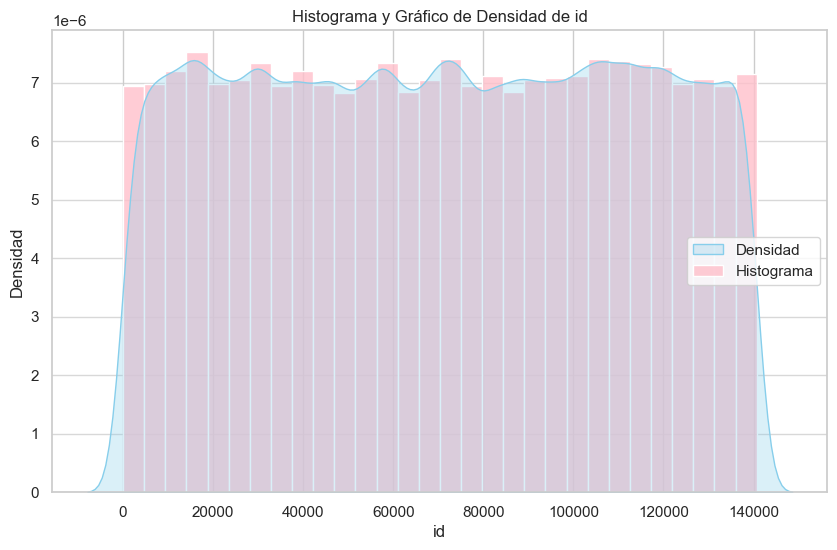

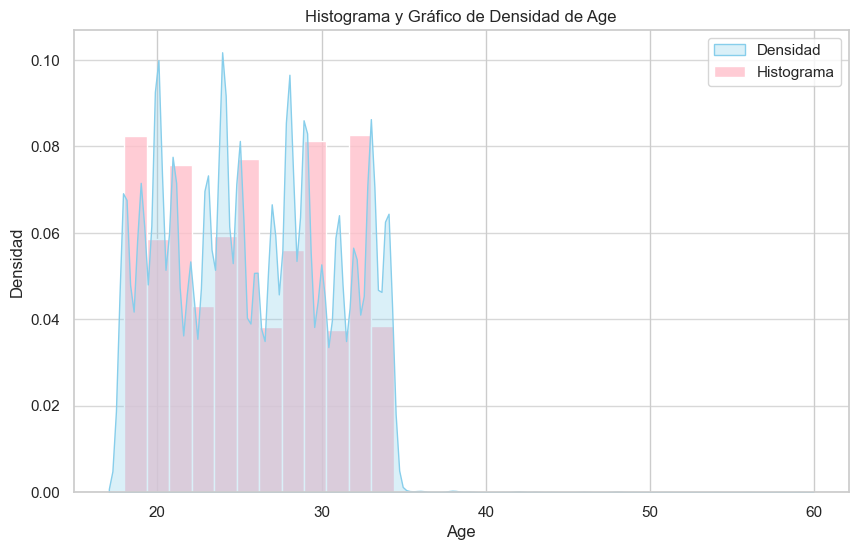

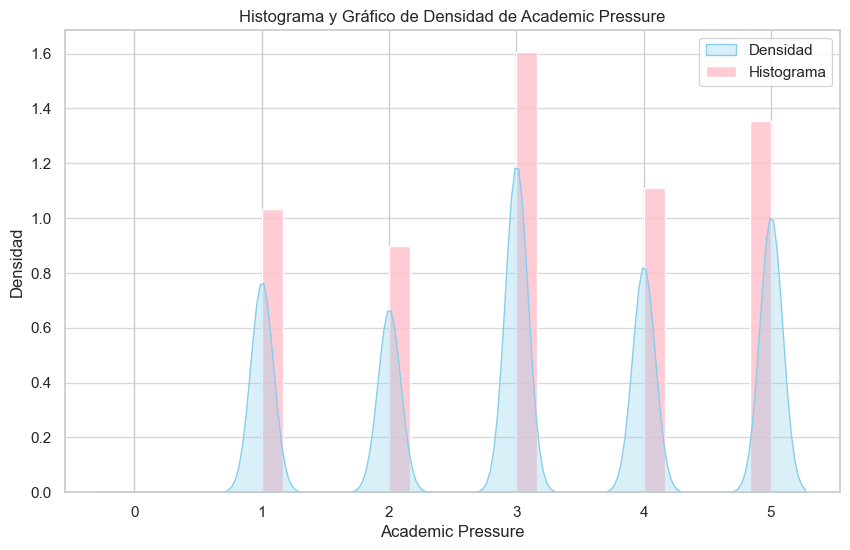

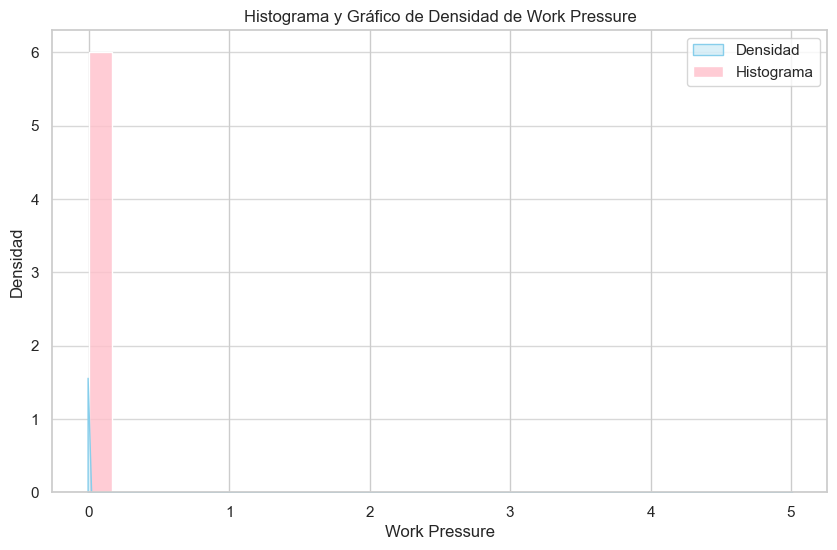

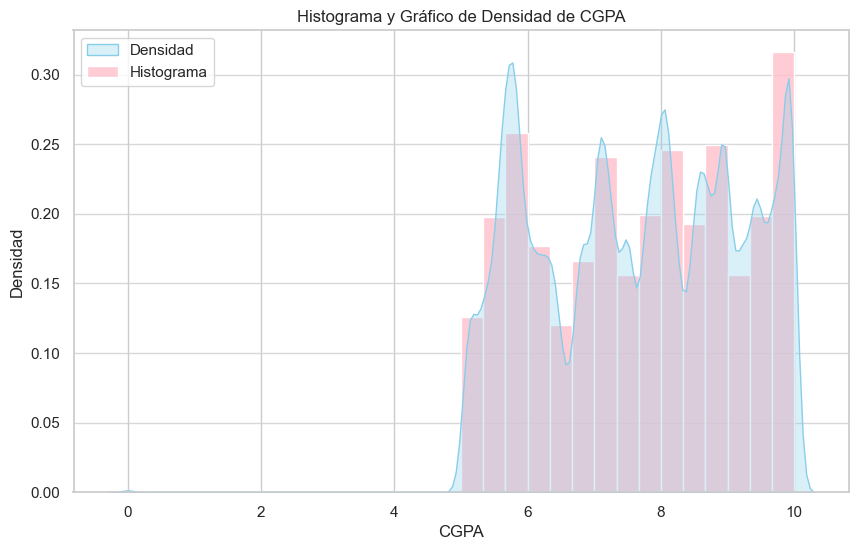

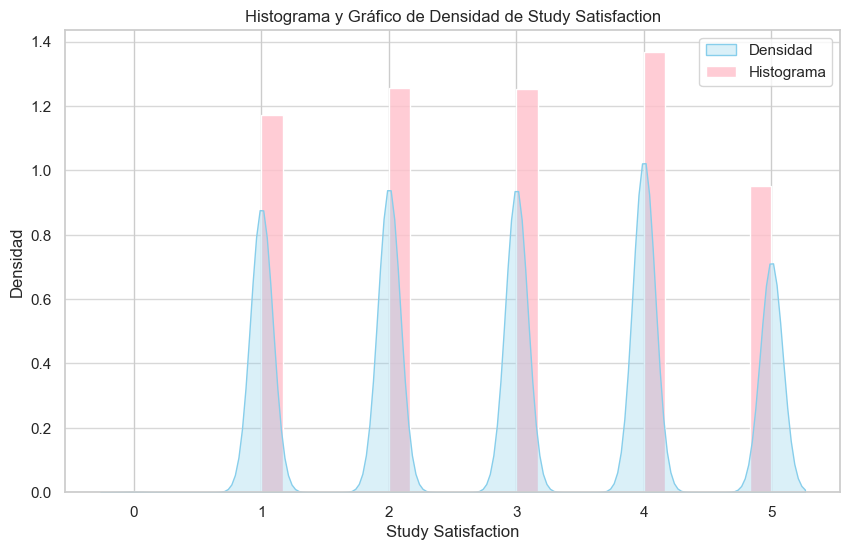

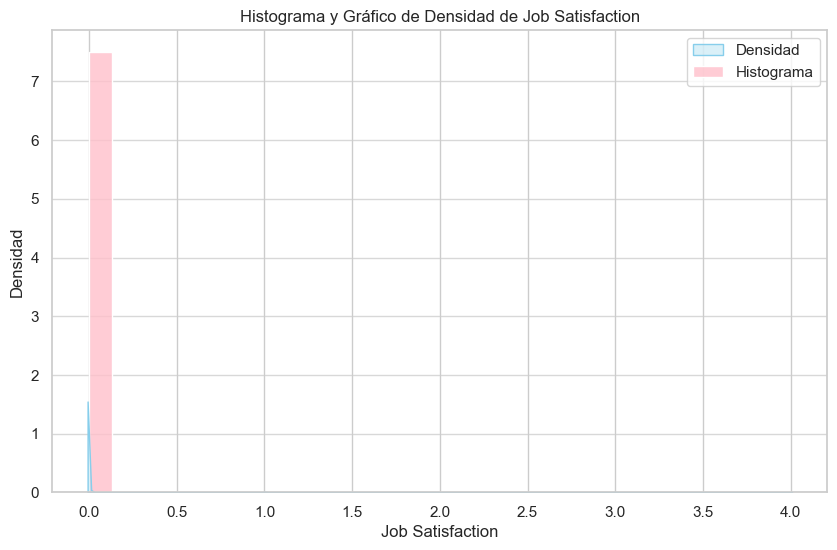

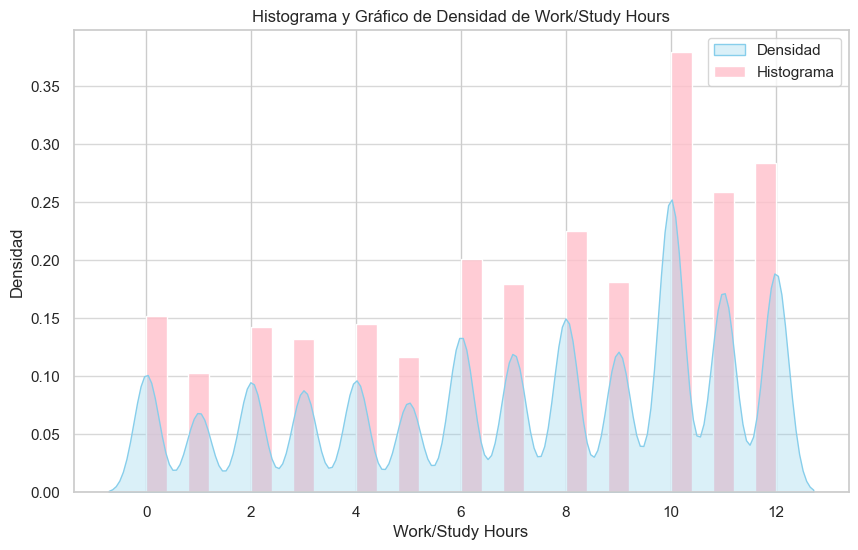

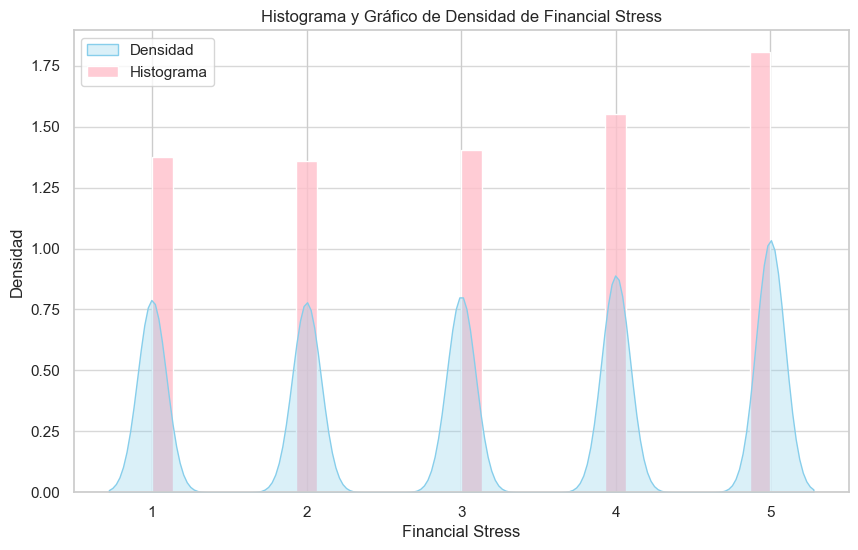

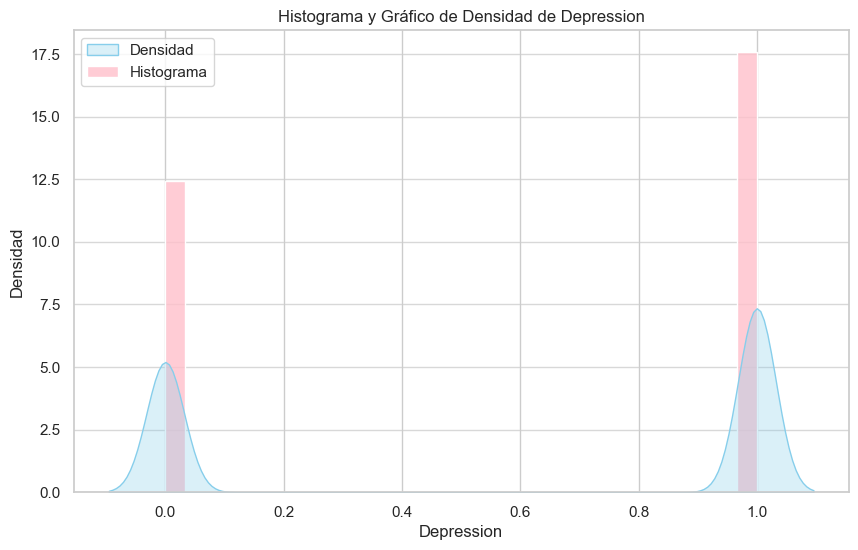

In [55]:
sns.set(style="whitegrid")

# Iterar sobre las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    # Graficar el histograma
    sns.histplot(df[column], bins=30, color='pink', kde=False, stat='density', alpha=0.8)
    
    # Graficar la densidad
    sns.kdeplot(df[column], color='skyblue', fill=True, bw_adjust=0.5, alpha=0.3)
    
    plt.title(f'Histograma y Gráfico de Densidad de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.grid(axis='y', alpha=0.75)
    plt.legend(['Densidad', 'Histograma'])
    plt.show()

## Boxplot

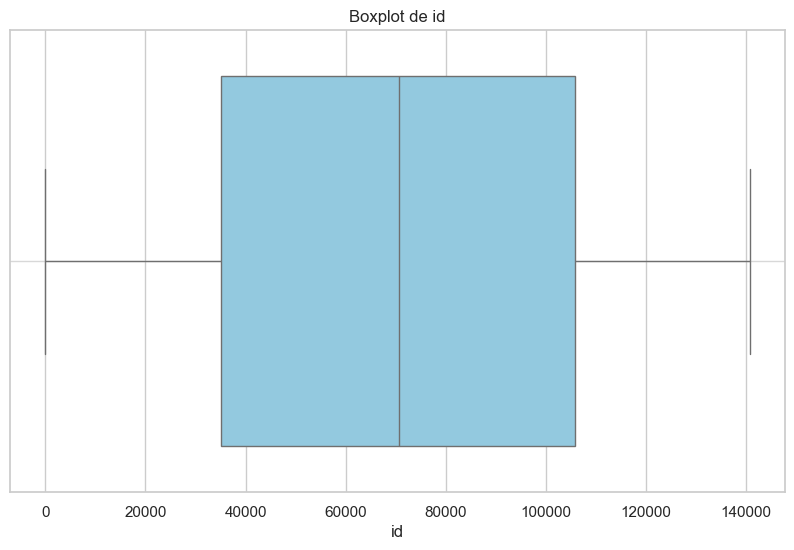

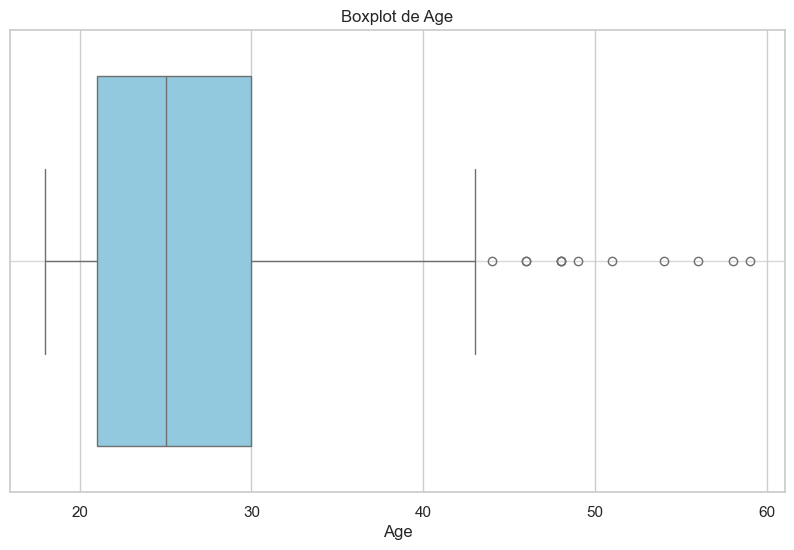

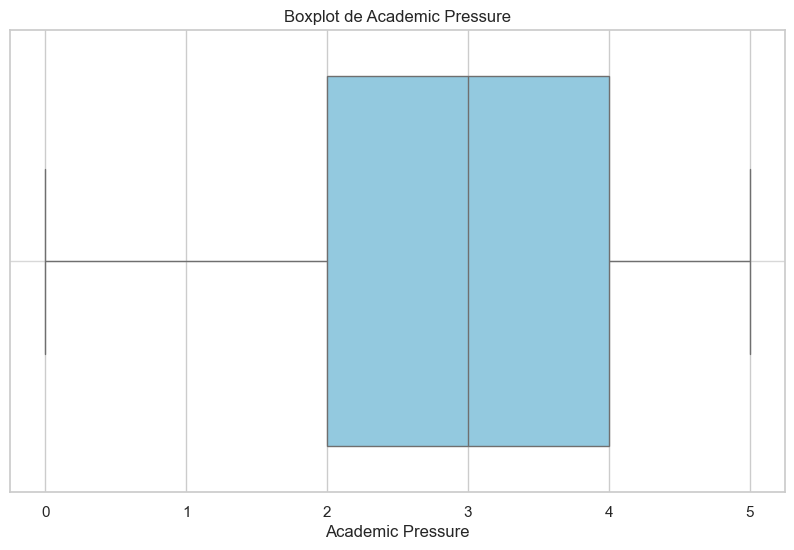

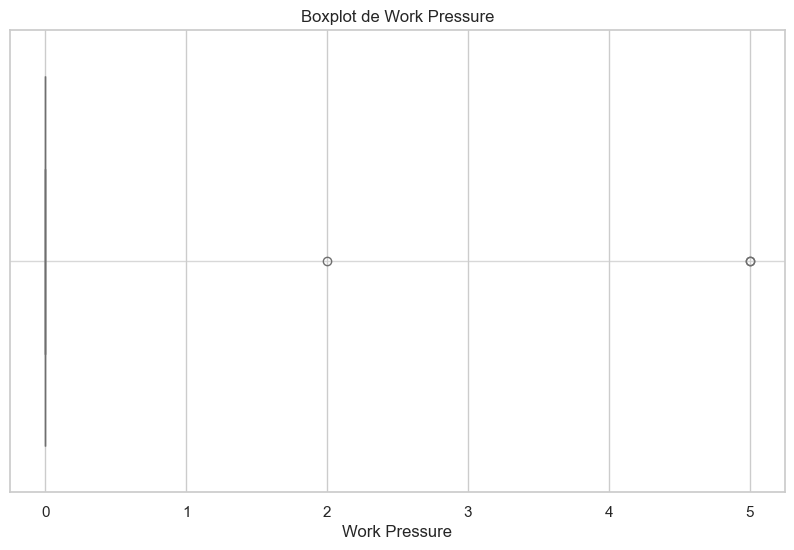

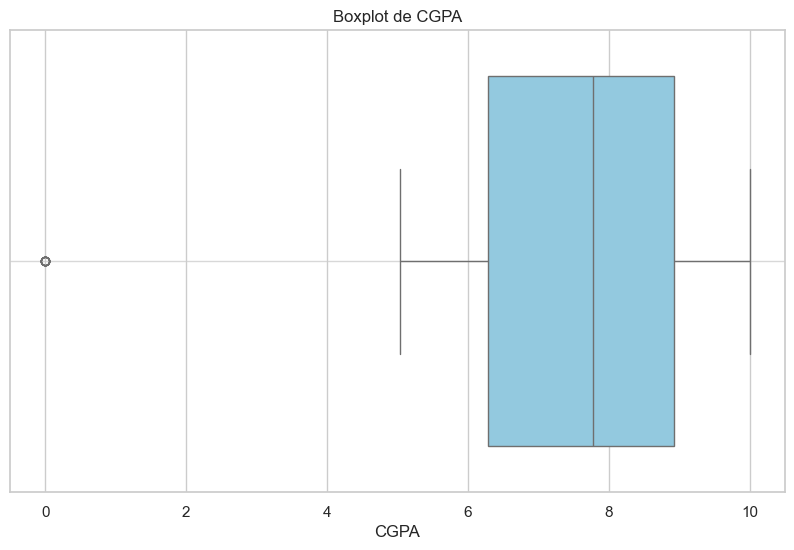

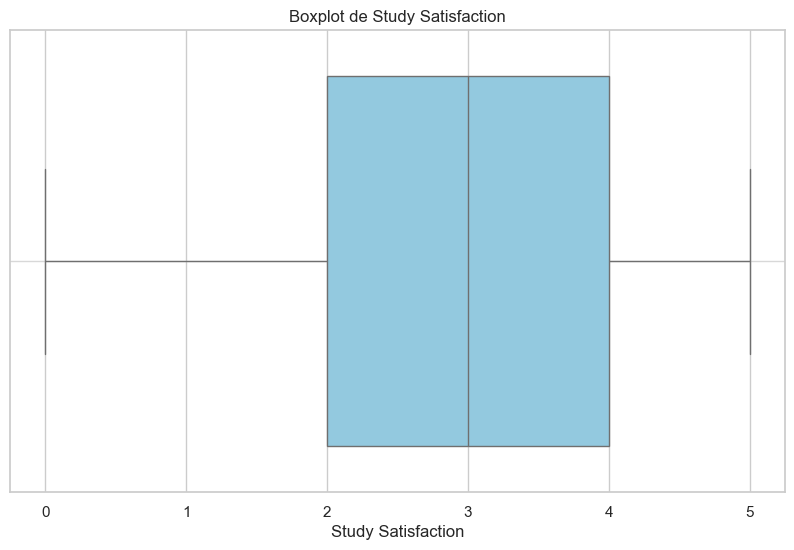

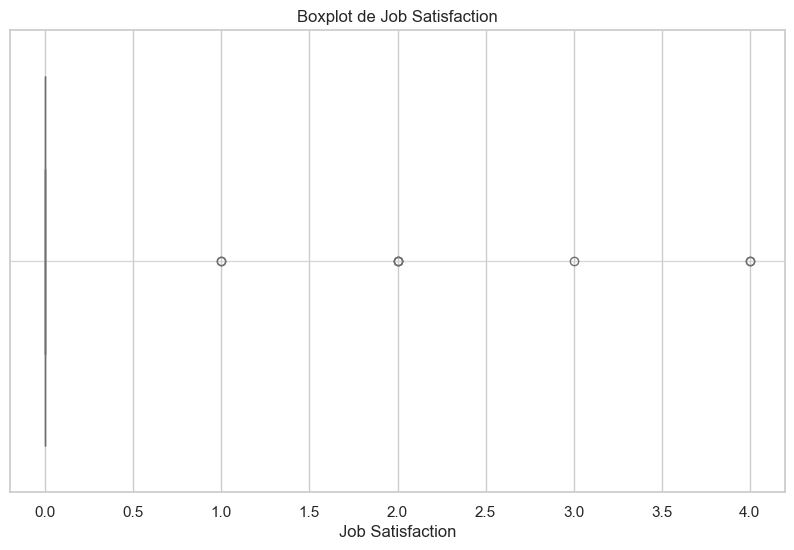

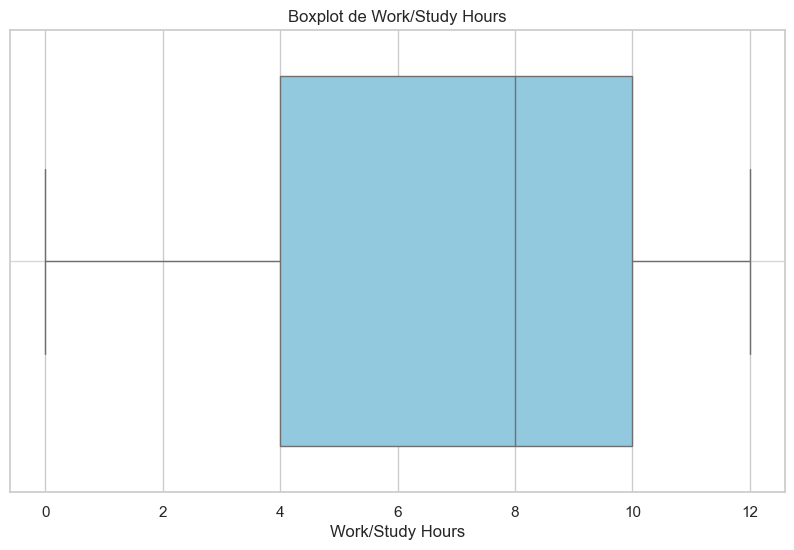

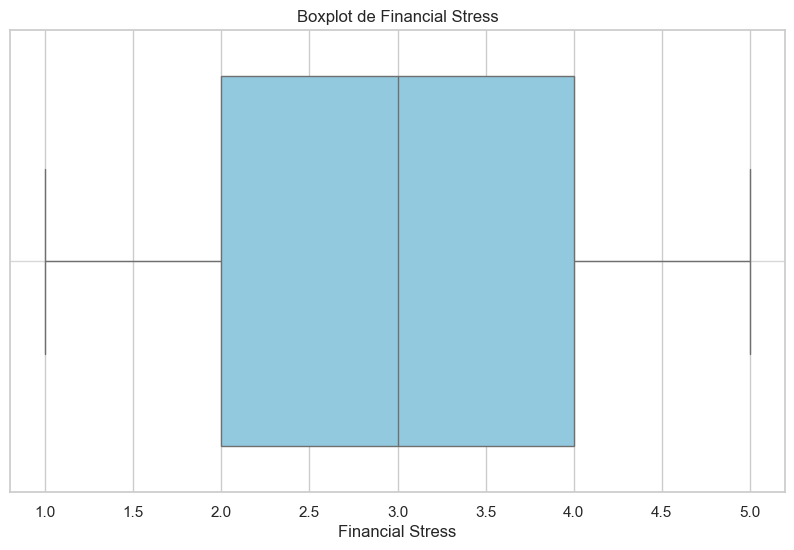

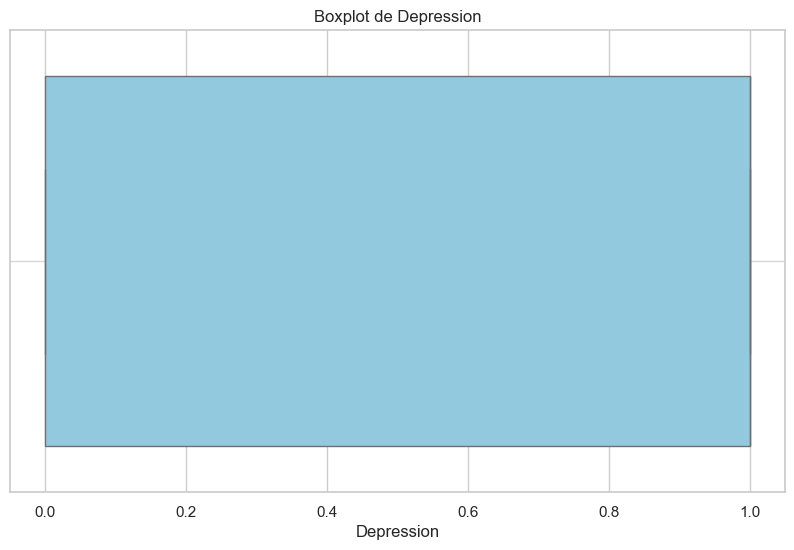

In [58]:
sns.set(style="whitegrid")

# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Iterar sobre las columnas numéricas y generar boxplots
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

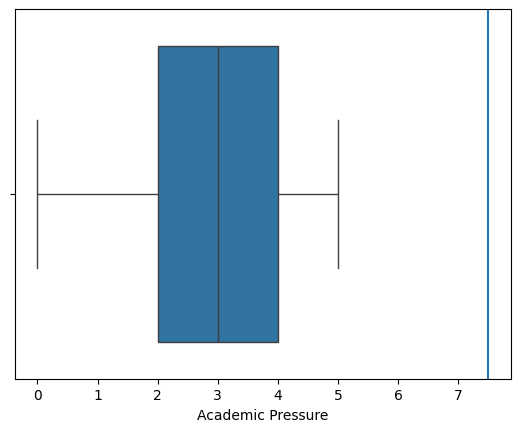

In [29]:
sns.boxplot(data = df, x='Academic Pressure')
plt.axvline(x=7.5);

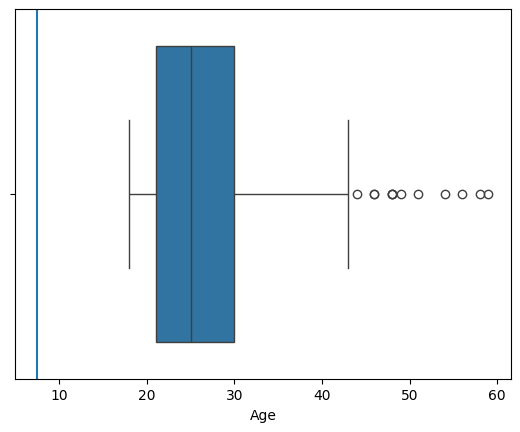

In [33]:
sns.boxplot(data = df, x='Age')
plt.axvline(x=7.5);

## Pruebas de normalidad

Prueba de Shapiro-Wilk para id: Estadística=0.954, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para id.



c:\Users\nuria\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27901.
  res = hypotest_fun_out(*samples, **kwds)


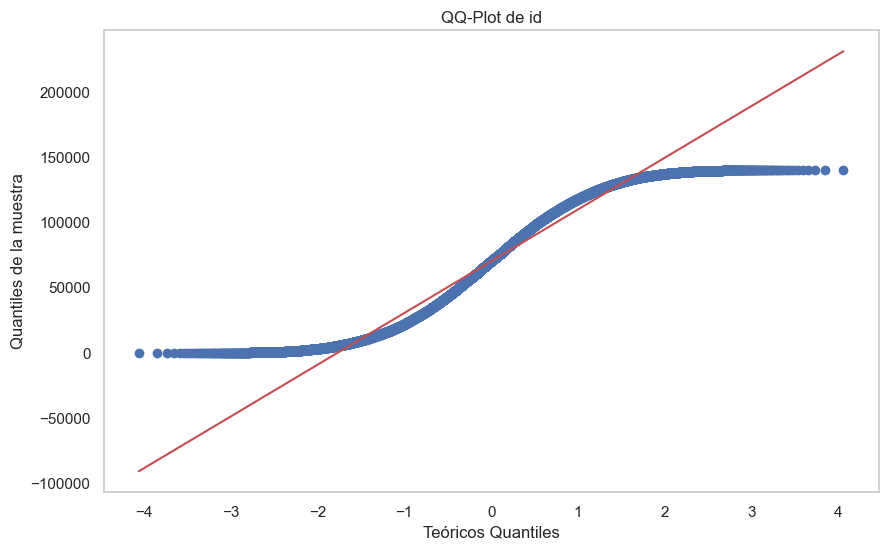

Prueba de Shapiro-Wilk para Age: Estadística=0.950, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para Age.



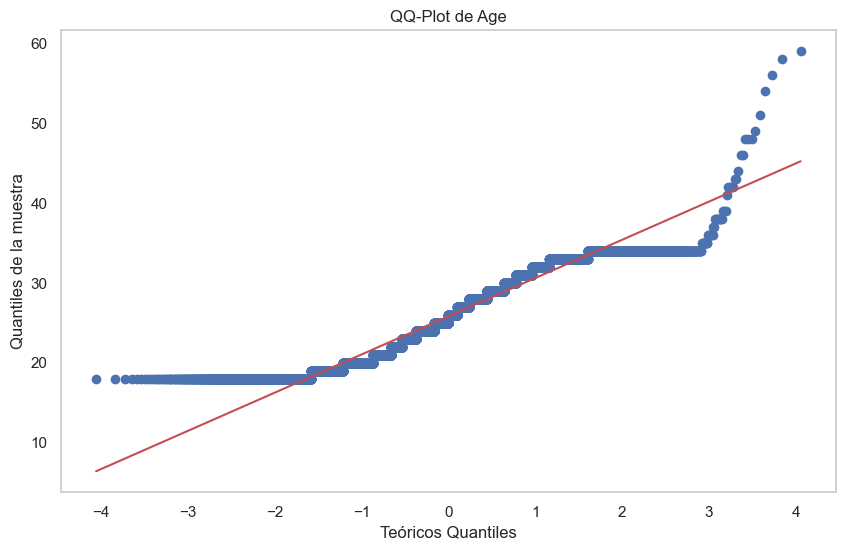

Prueba de Shapiro-Wilk para Academic Pressure: Estadística=0.892, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para Academic Pressure.



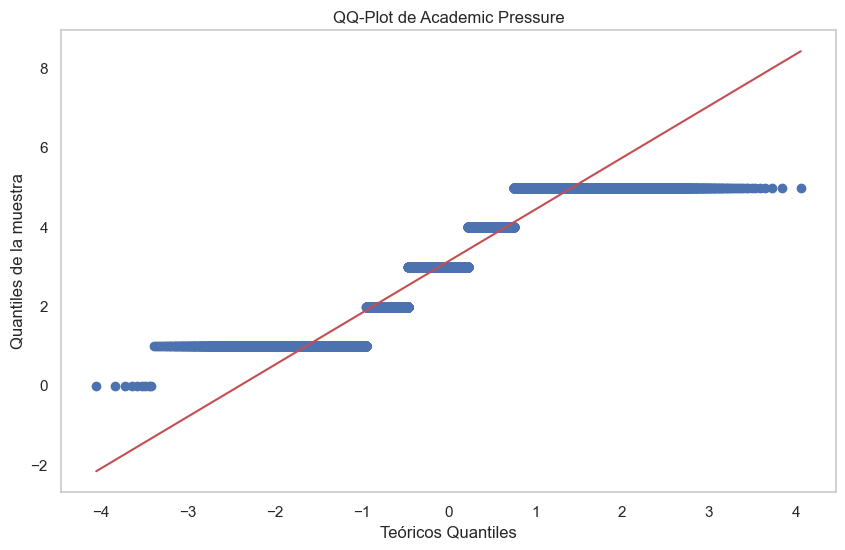

Prueba de Shapiro-Wilk para Work Pressure: Estadística=0.002, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para Work Pressure.



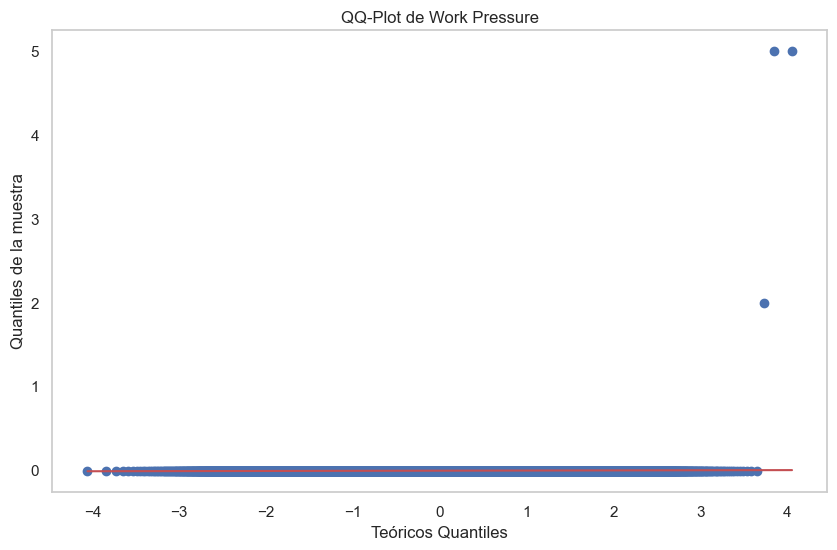

Prueba de Shapiro-Wilk para CGPA: Estadística=0.948, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para CGPA.



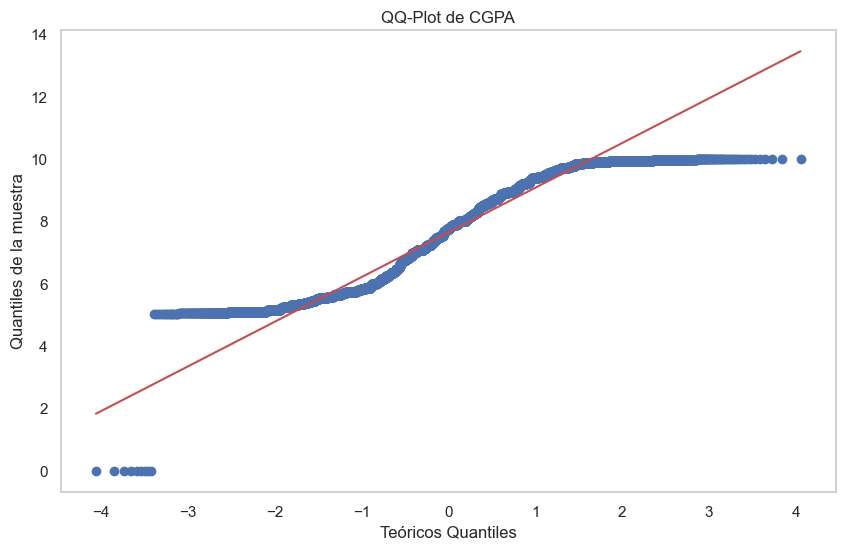

Prueba de Shapiro-Wilk para Study Satisfaction: Estadística=0.898, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para Study Satisfaction.



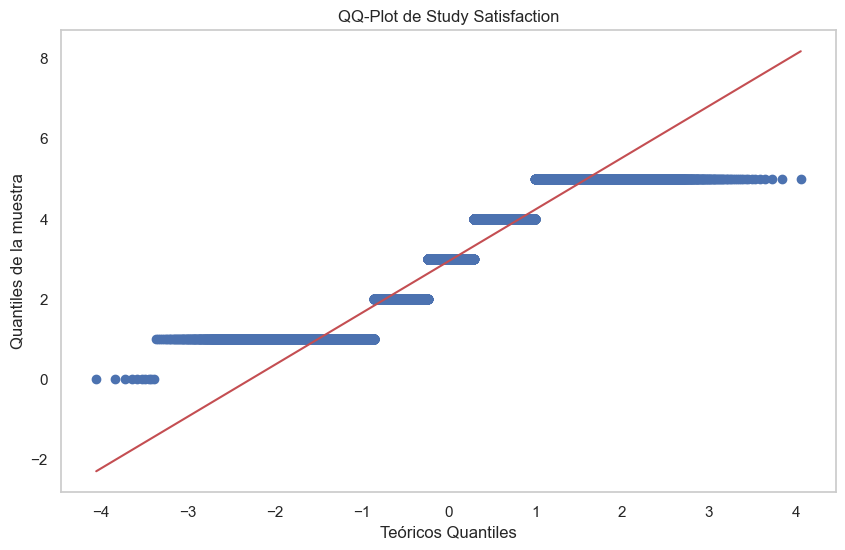

Prueba de Shapiro-Wilk para Job Satisfaction: Estadística=0.003, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para Job Satisfaction.



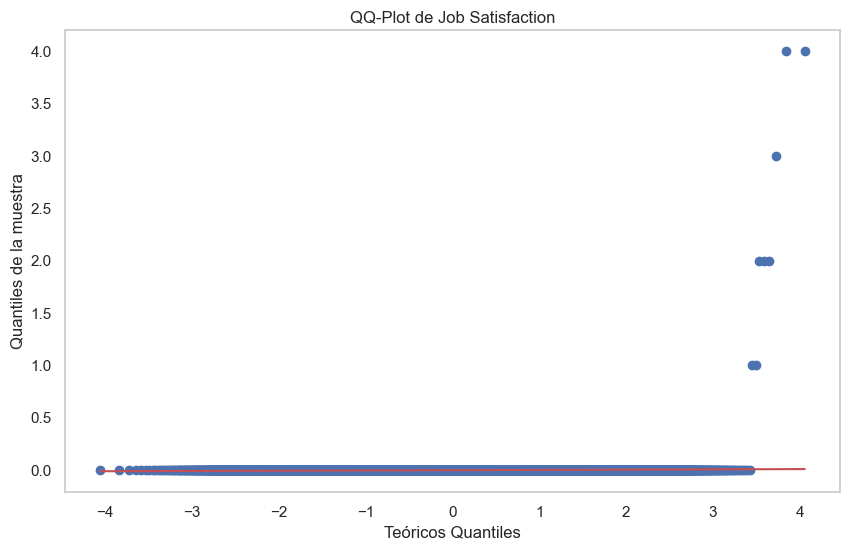

Prueba de Shapiro-Wilk para Work/Study Hours: Estadística=0.921, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para Work/Study Hours.



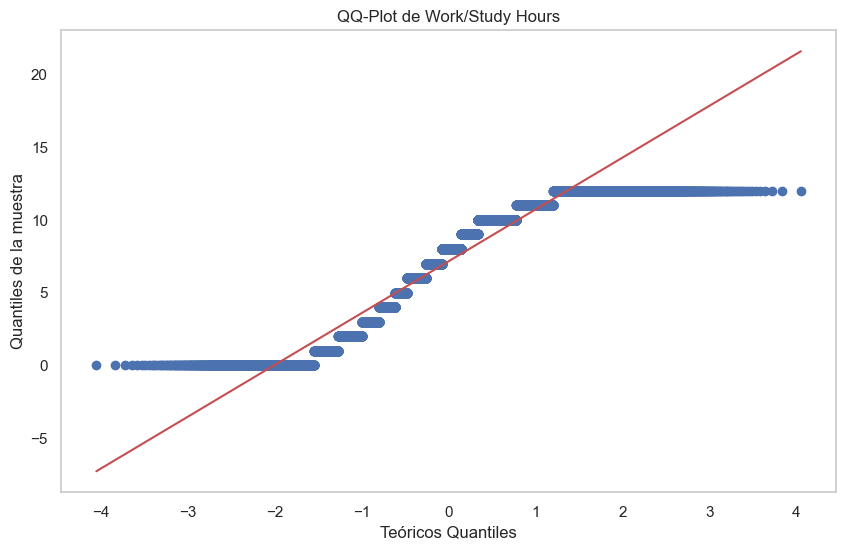

Prueba de Shapiro-Wilk para Financial Stress: Estadística=0.880, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para Financial Stress.



c:\Users\nuria\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27898.
  res = hypotest_fun_out(*samples, **kwds)


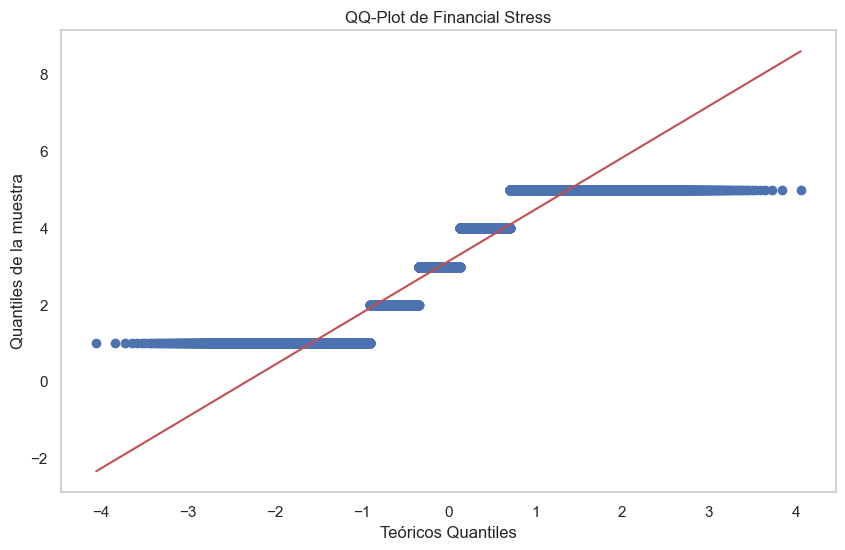

Prueba de Shapiro-Wilk para Depression: Estadística=0.626, p-valor=0.000
La muestra no parece provenir de una distribución normal (se rechaza H0) para Depression.



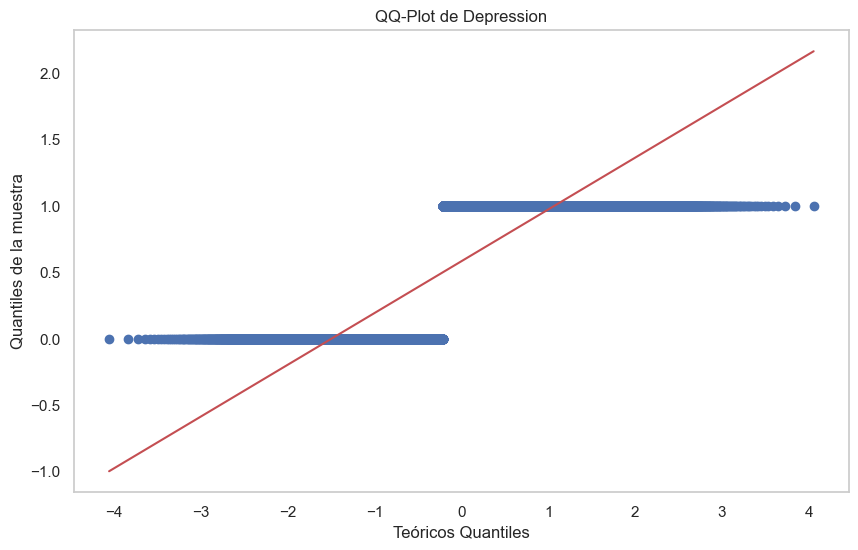

In [57]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Iterar sobre las columnas numéricas
for column in numeric_columns:
    # Calcular la prueba de Shapiro-Wilk
    stat, p_value = stats.shapiro(df[column].dropna())
    
    # Mostrar el resultado de la prueba
    print(f'Prueba de Shapiro-Wilk para {column}: Estadística={stat:.3f}, p-valor={p_value:.3f}')
    
    # Interpretar el resultado
    alpha = 0.05
    if p_value > alpha:
        print(f'La muestra parece provenir de una distribución normal (no se rechaza H0) para {column}.\n')
    else:
        print(f'La muestra no parece provenir de una distribución normal (se rechaza H0) para {column}.\n')
    
    # Graficar el QQ-Plot
    plt.figure(figsize=(10, 6))
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ-Plot de {column}')
    plt.xlabel('Teóricos Quantiles')
    plt.ylabel('Quantiles de la muestra')
    plt.grid()
    plt.show()

### Observaciones
- Habiendo aplicado las pruebas de normalidad podemos observar que no estos datos no tienen una distrubución normal, por lo tanto se rechaza la hipotesis nula.

### Conclusiones
- Se puede eliminar la columna 'Work Pressure' y  'Job satisfaction' ya que no sabemos exactamente la cantidad de estudiantes que trabajan, parece ser que son pocos ya que la mayoria de los datos están en 0 lo que hace que la media no tenga sentido (con los que si trabajan)

## Frecuencias absolutas y relativas

Frecuencias absolutas para Gender:
Gender
Male      15547
Female    12354
Name: count, dtype: int64

Frecuencias relativas para Gender:
Gender
Male      0.55722
Female    0.44278
Name: proportion, dtype: float64



C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


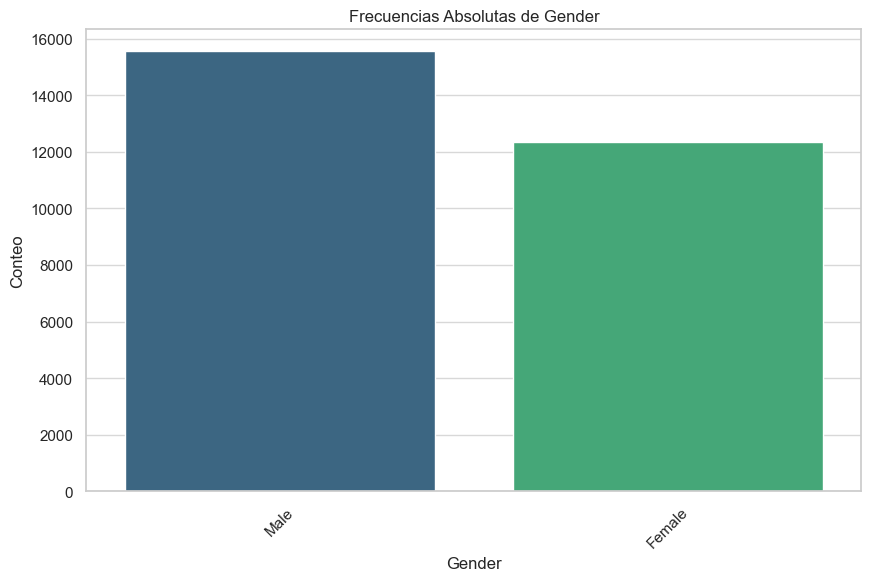

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)


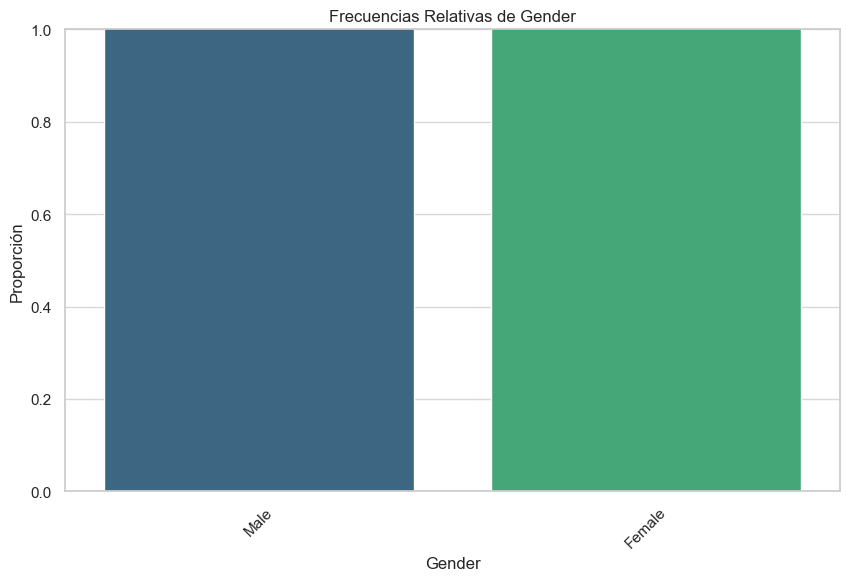

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


Frecuencias absolutas para City:
City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech           

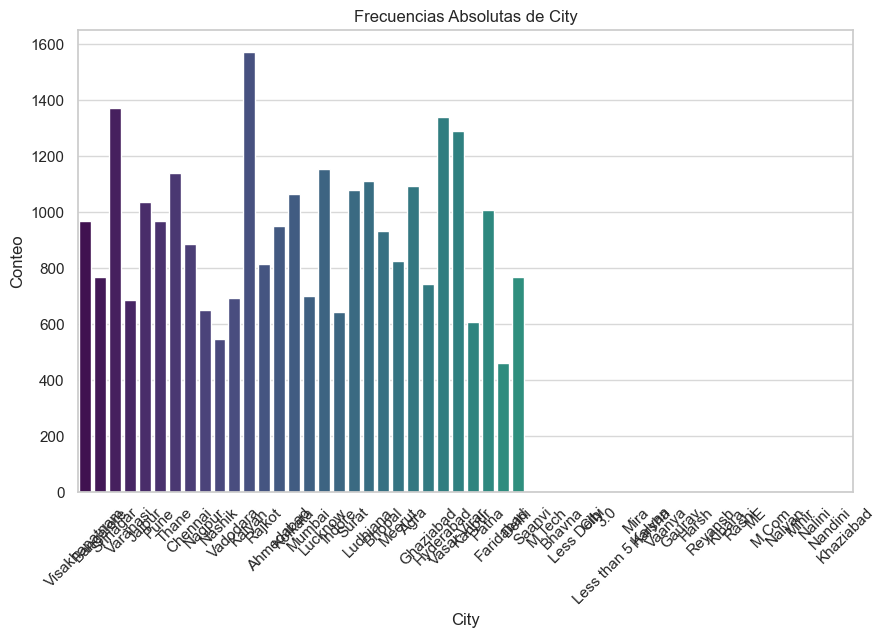

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)


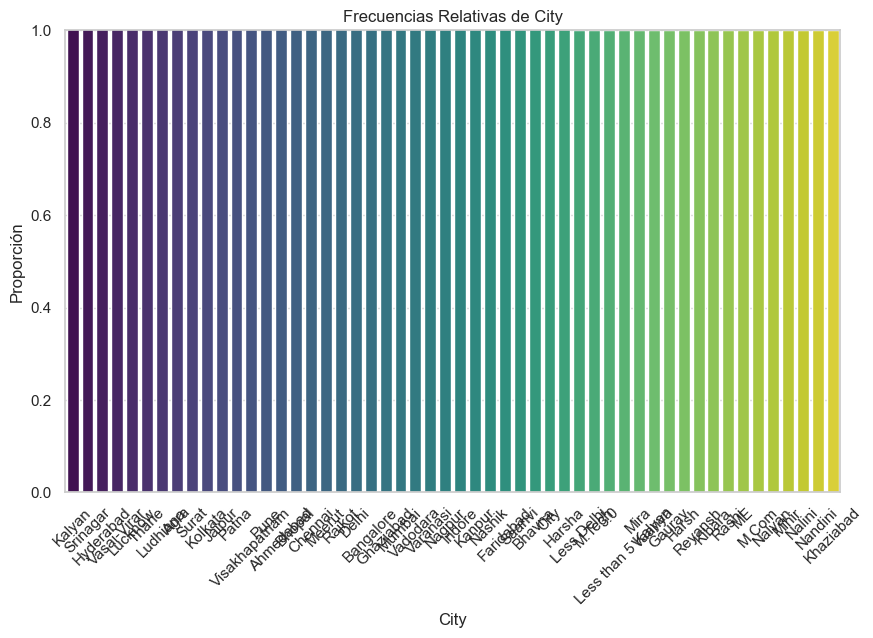

Frecuencias absolutas para Profession:
Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

Frecuencias relativas para Profession:
Profession
Student                   0.998889
Architect                 0.000287
Teacher                   0.000215
Digital Marketer          0.000108
Chef                      0.000072
Content Writer            0.000072
Pharmacist                0.000072
Doctor                    0.000072
UX/UI Designer            0.000036
Civil Engineer            0.000036
Manager                   0.000036
Educational Consultant    0.000036
Lawye

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


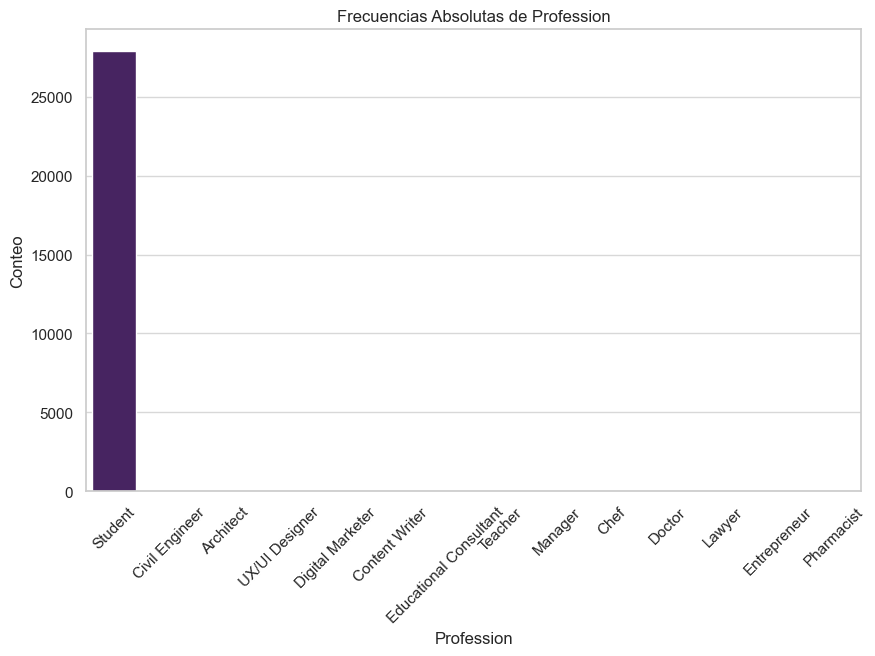

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)


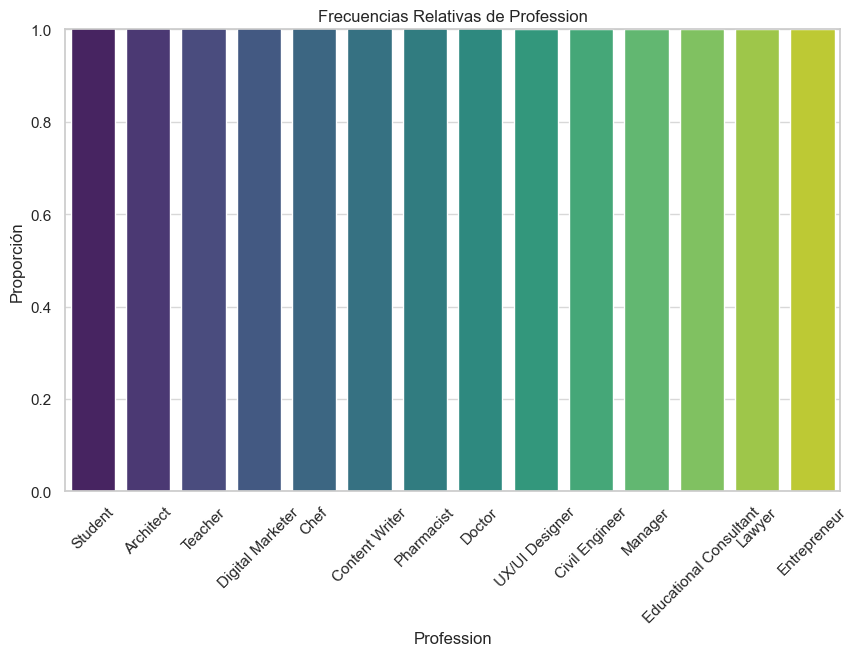

Frecuencias absolutas para Sleep Duration:
Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

Frecuencias relativas para Sleep Duration:
Sleep Duration
Less than 5 hours    0.297839
7-8 hours            0.263288
5-6 hours            0.221605
More than 8 hours    0.216623
Others               0.000645
Name: proportion, dtype: float64



C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


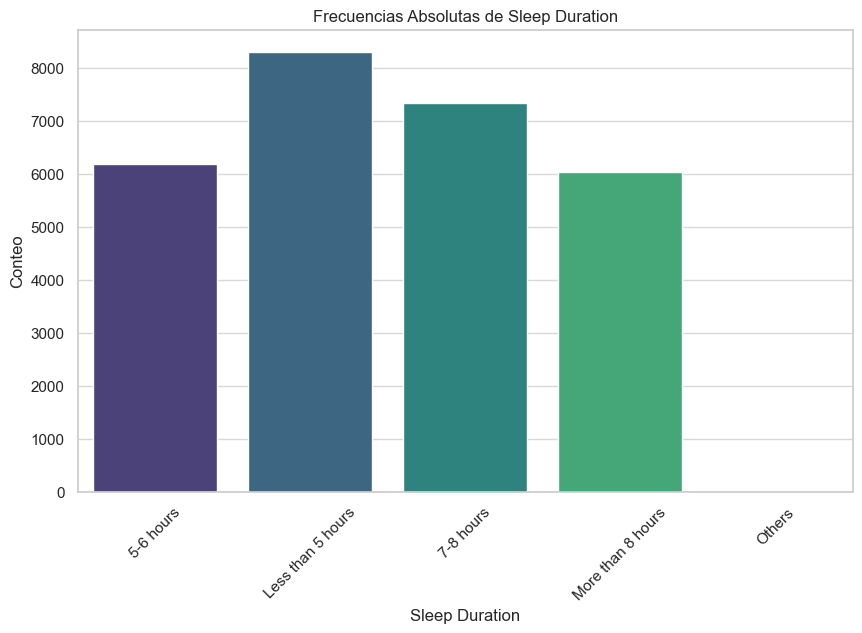

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)


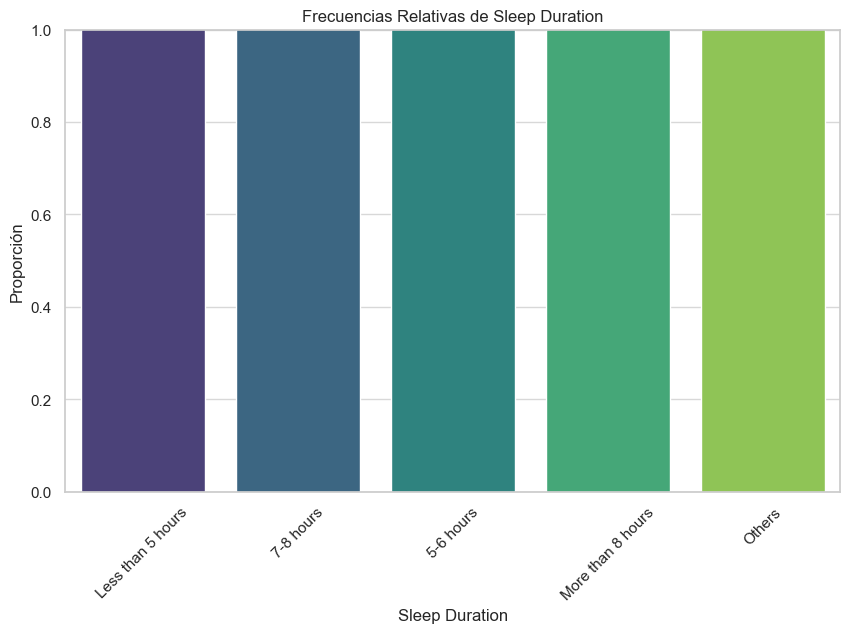

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


Frecuencias absolutas para Dietary Habits:
Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

Frecuencias relativas para Dietary Habits:
Dietary Habits
Unhealthy    0.369772
Moderate     0.355579
Healthy      0.274220
Others       0.000430
Name: proportion, dtype: float64



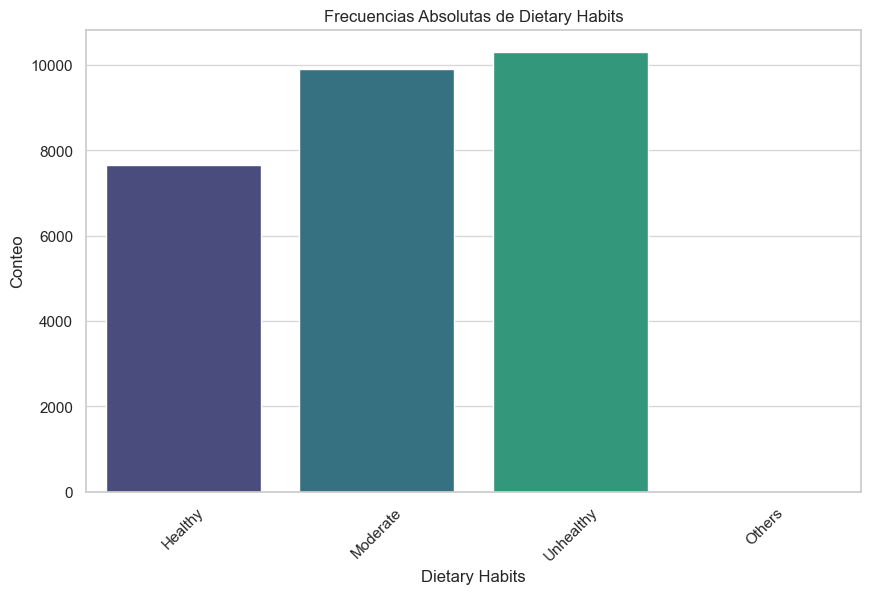

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)


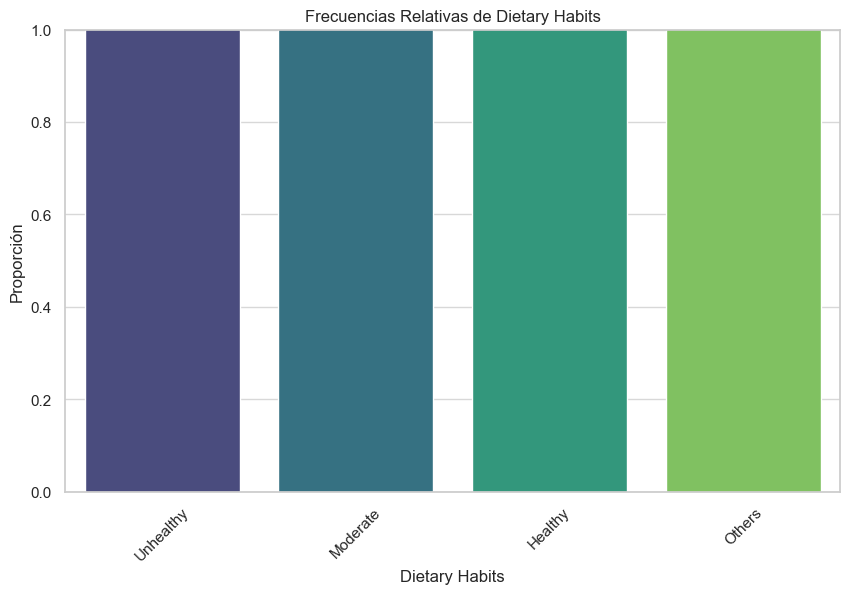

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


Frecuencias absolutas para Degree:
Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
BBA          696
MBBS         696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

Frecuencias relativas para Degree:
Degree
Class 12    0.217913
B.Ed        0.066915
B.Com       0.053977
B.Arch      0.052973
BCA         0.051360
MSc         0.042651
B.Tech      0.041289
MCA         0.037418
M.Tech      0.036630
BHM         0.033153
BSc         0.031827
M.Ed        0.029425
B.Pharm     0.029031
M.Com       0.026307
BBA         0.024945
MBBS        0.024945
LLB         0.024049
BE          0.021971
BA          0.021505
M.Pharm     0.

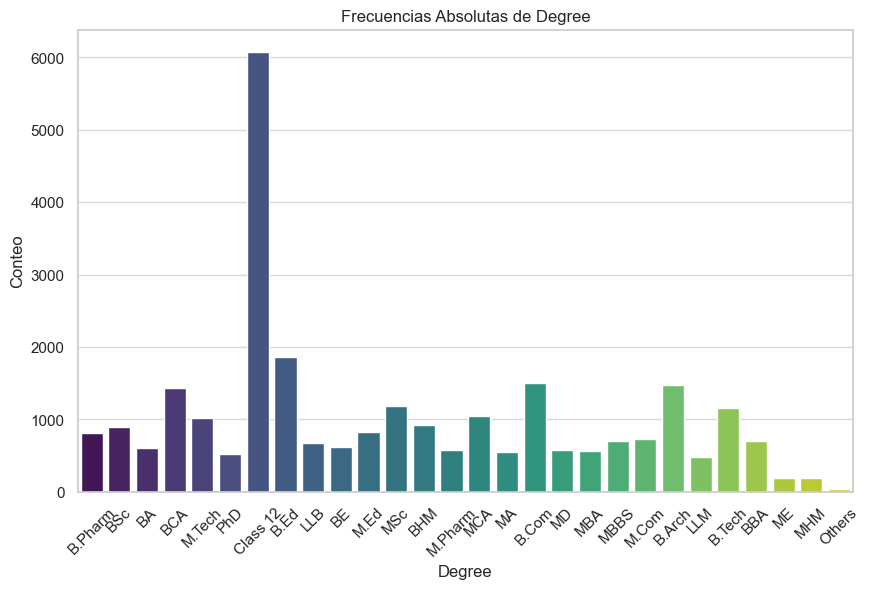

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)


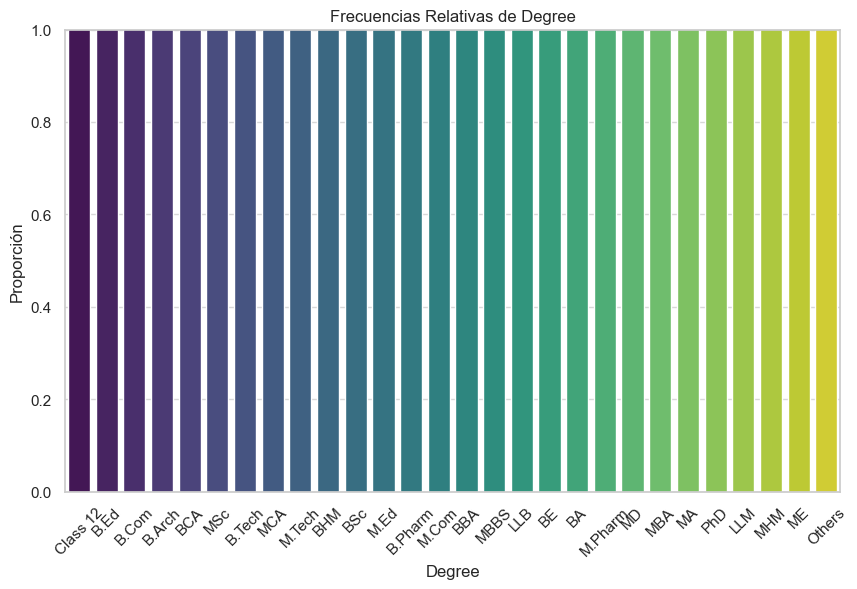

Frecuencias absolutas para Have you ever had suicidal thoughts ?:
Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64

Frecuencias relativas para Have you ever had suicidal thoughts ?:
Have you ever had suicidal thoughts ?
Yes    0.632809
No     0.367191
Name: proportion, dtype: float64



C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


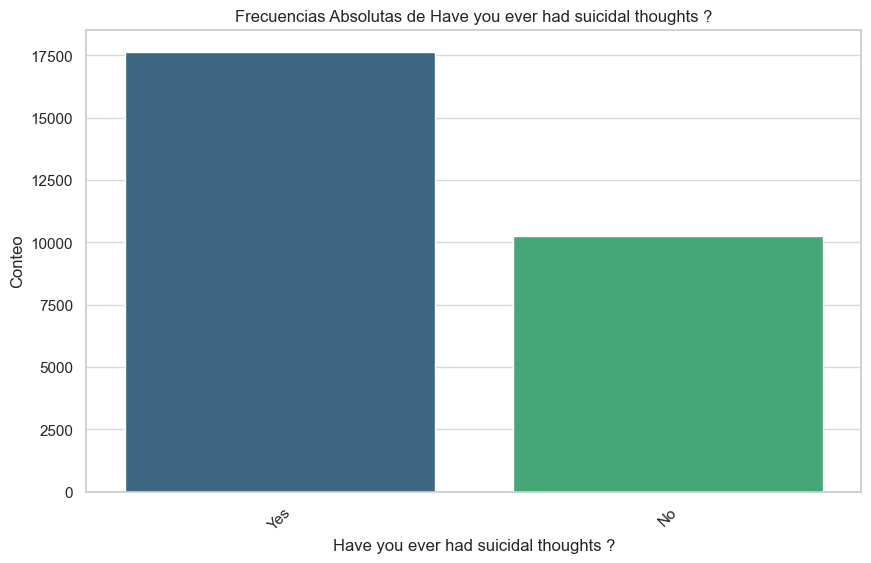

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)


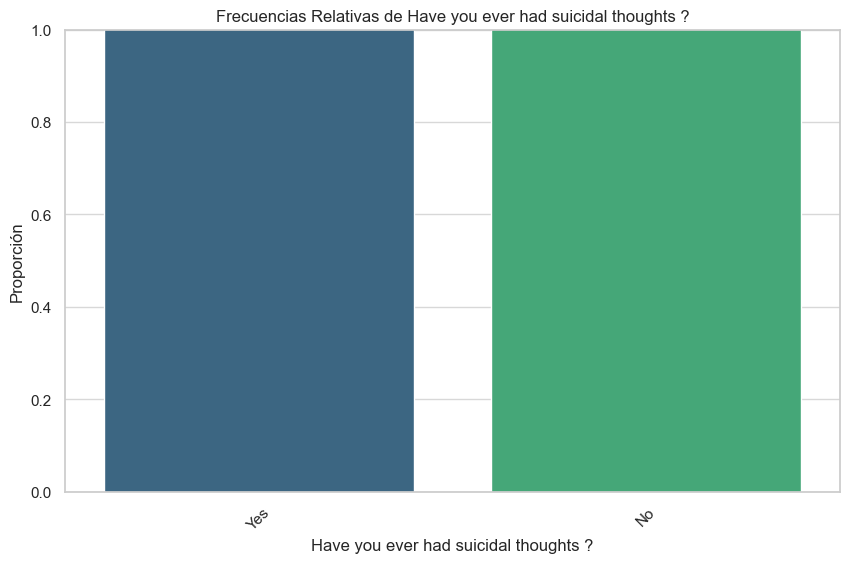

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


Frecuencias absolutas para Family History of Mental Illness:
Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64

Frecuencias relativas para Family History of Mental Illness:
Family History of Mental Illness
No     0.516039
Yes    0.483961
Name: proportion, dtype: float64



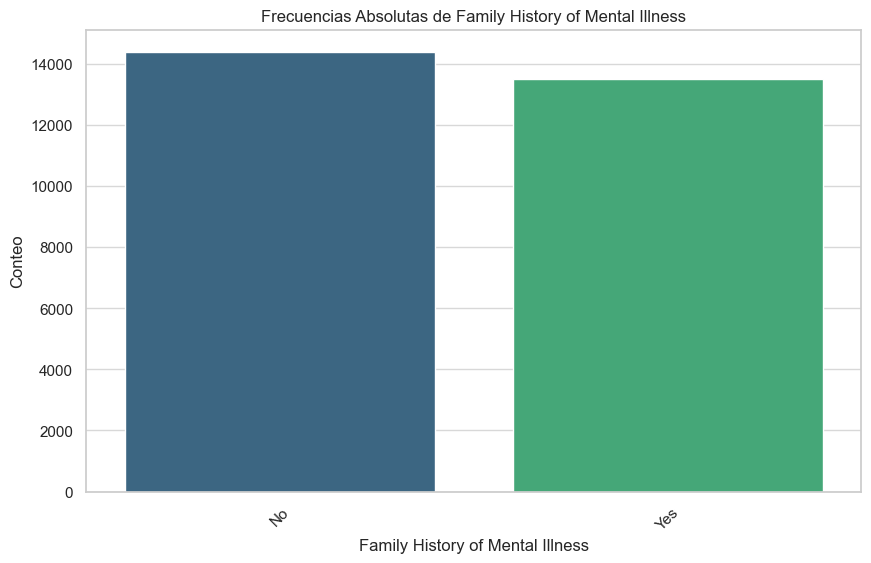

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\129847138.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)


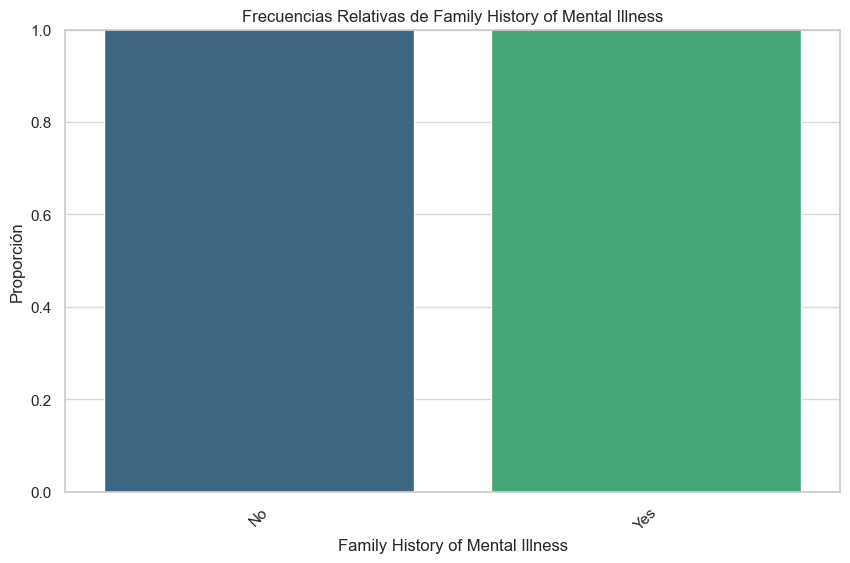

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv(r'C:\Users\nuria\Proyecto_EDA\data\raw\Student Depression Dataset.csv')

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Seleccionar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterar sobre las columnas categóricas
for column in categorical_columns:
    # Calcular frecuencias absolutas
    absolute_counts = df[column].value_counts()
    
    # Calcular frecuencias relativas
    relative_counts = df[column].value_counts(normalize=True)

    # Mostrar frecuencias absolutas
    print(f'Frecuencias absolutas para {column}:\n{absolute_counts}\n')
    
    # Mostrar frecuencias relativas
    print(f'Frecuencias relativas para {column}:\n{relative_counts}\n')

    # Graficar frecuencias absolutas
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Frecuencias Absolutas de {column}')
    plt.xlabel(column)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Graficar frecuencias relativas
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='viridis', order=absolute_counts.index)
    plt.title(f'Frecuencias Relativas de {column}')
    plt.xlabel(column)
    plt.ylabel('Proporción')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Limitar el eje y para proporciones
    plt.grid(axis='y', alpha=0.75)
    plt.show()


## Graficos de barra

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\2503518149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


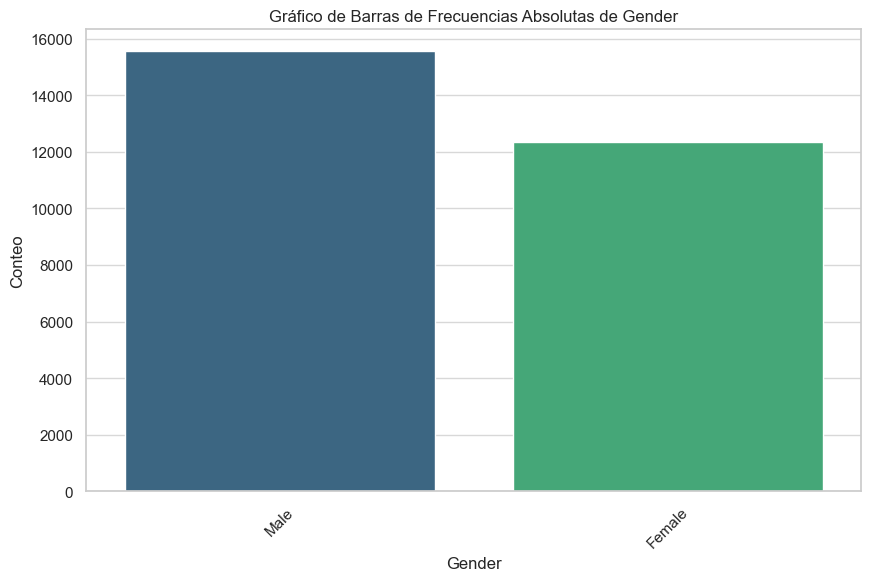

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\2503518149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


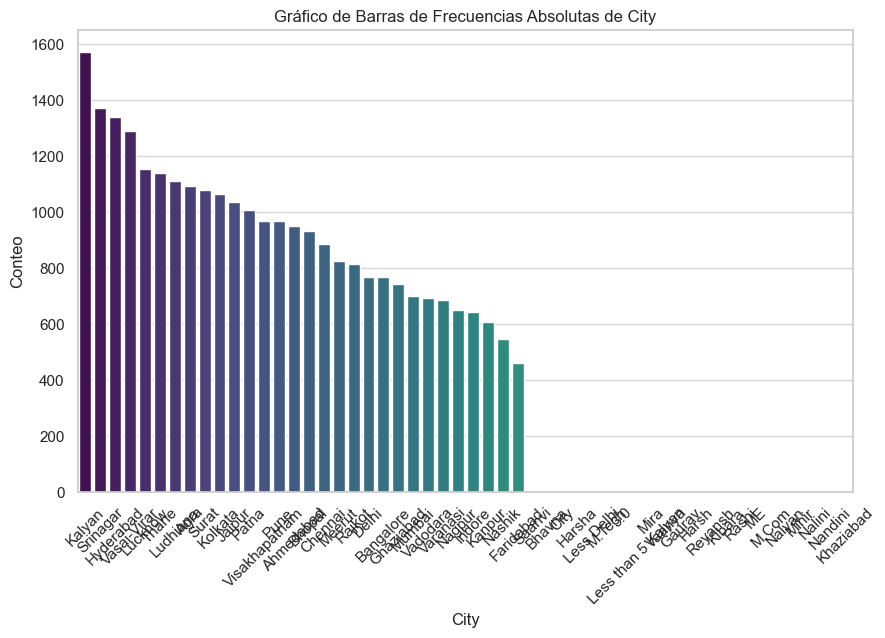

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\2503518149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


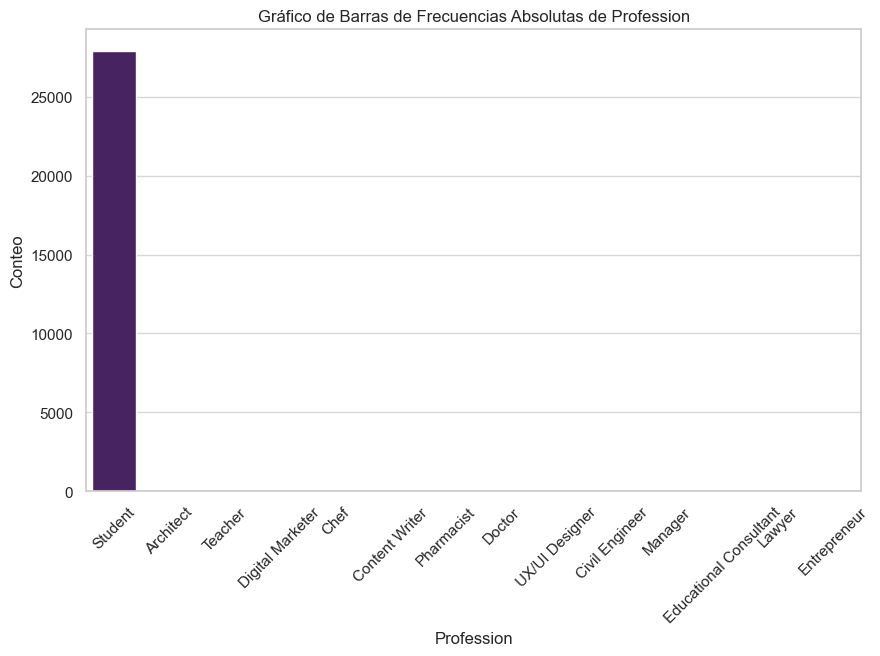

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\2503518149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


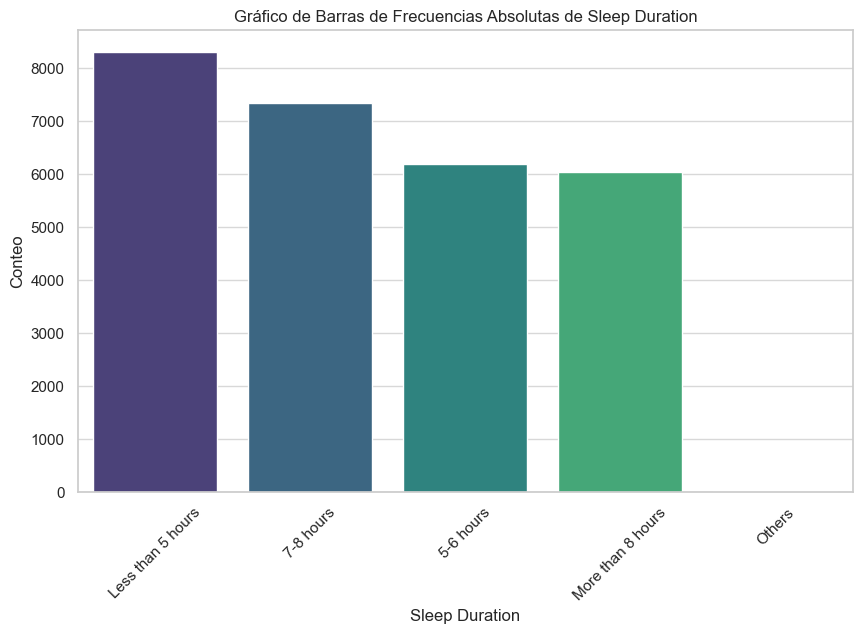

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\2503518149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


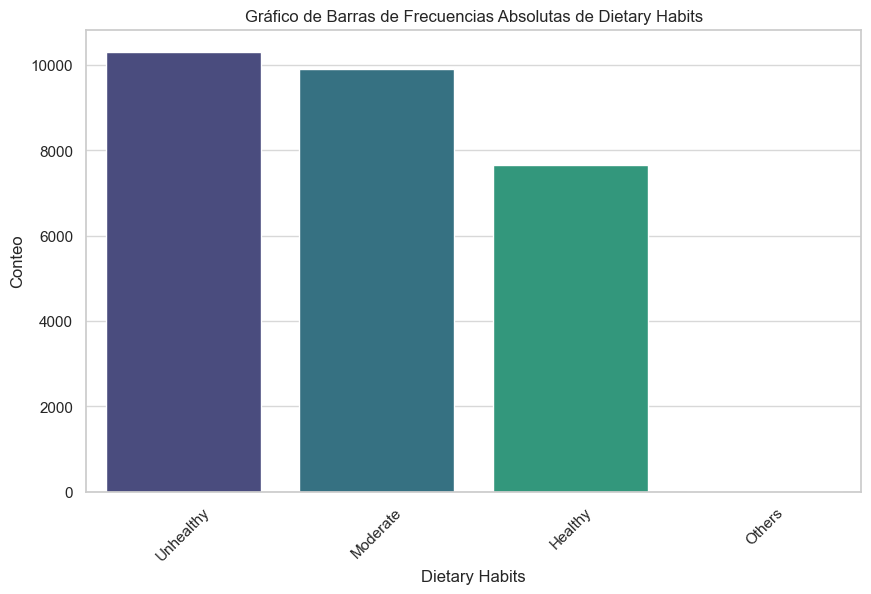

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\2503518149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


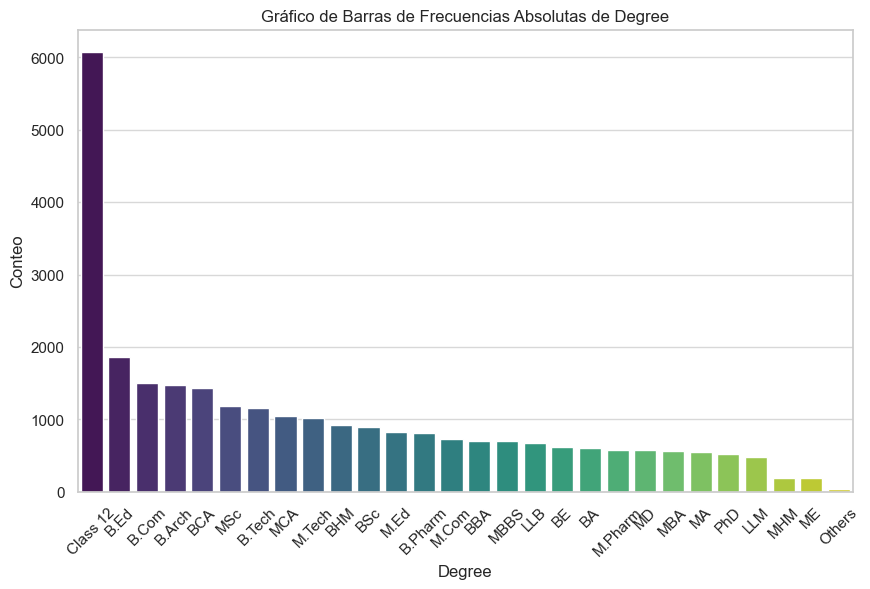

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\2503518149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


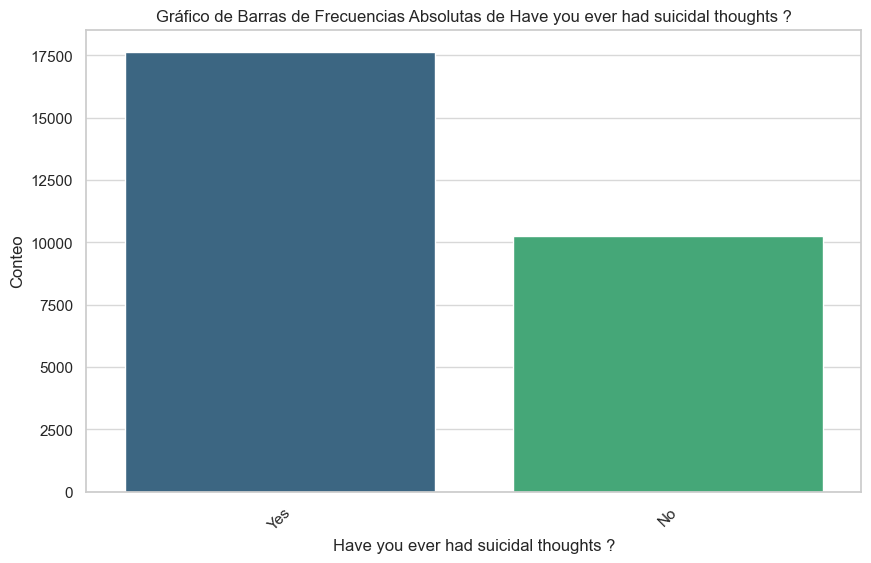

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\2503518149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


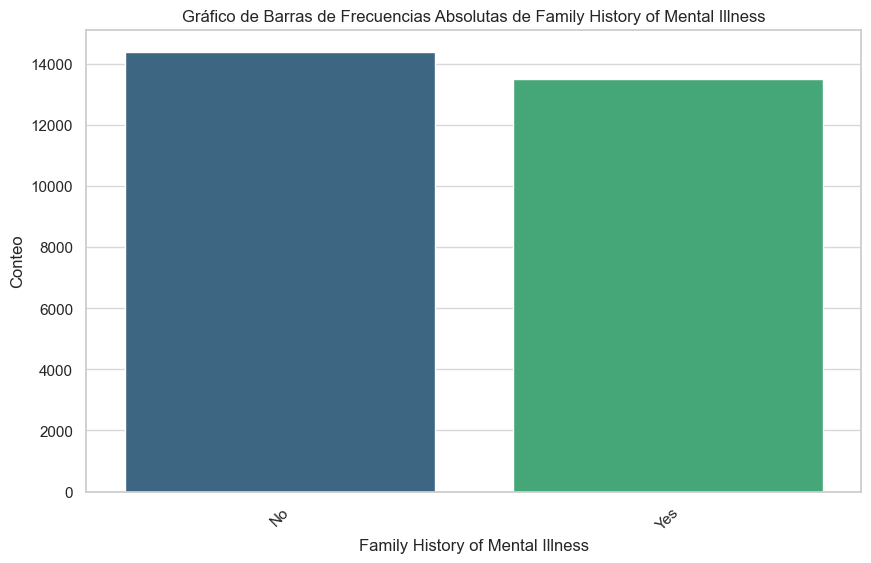

In [65]:
sns.set(style="whitegrid")

# Seleccionar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterar sobre las columnas categóricas y generar gráficos de barras
for column in categorical_columns:
    # Calcular frecuencias absolutas
    absolute_counts = df[column].value_counts()
    
    # Graficar frecuencias absolutas
    plt.figure(figsize=(10, 6))
    sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')
    plt.title(f'Gráfico de Barras de Frecuencias Absolutas de {column}')
    plt.xlabel(column)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## Diagramas de pareto

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\3991578648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


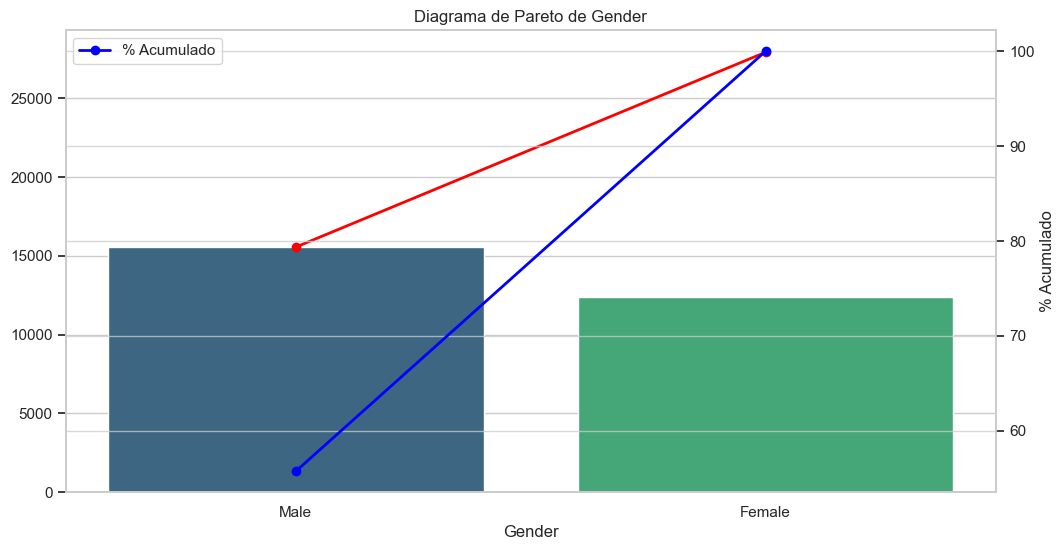

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\3991578648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


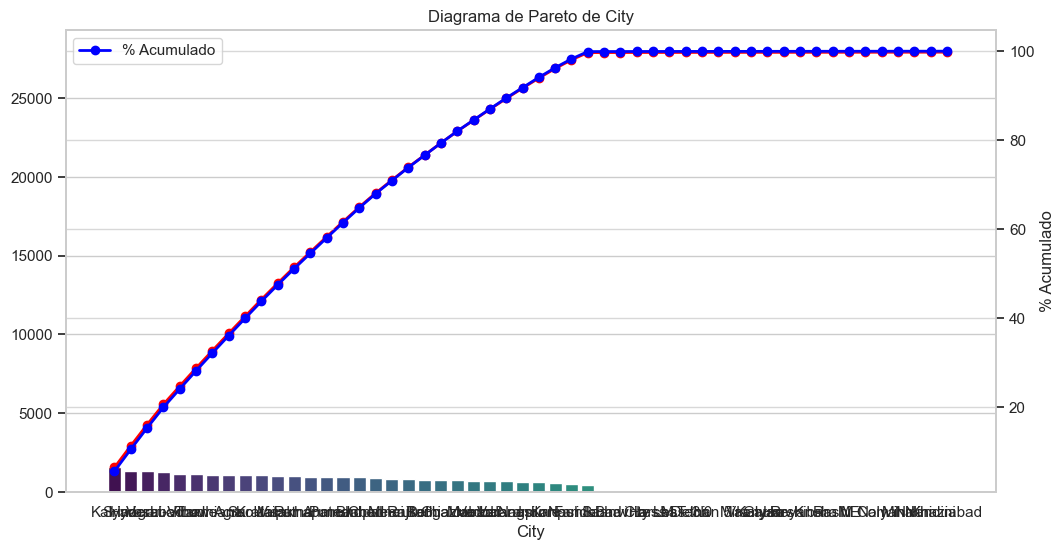

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\3991578648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


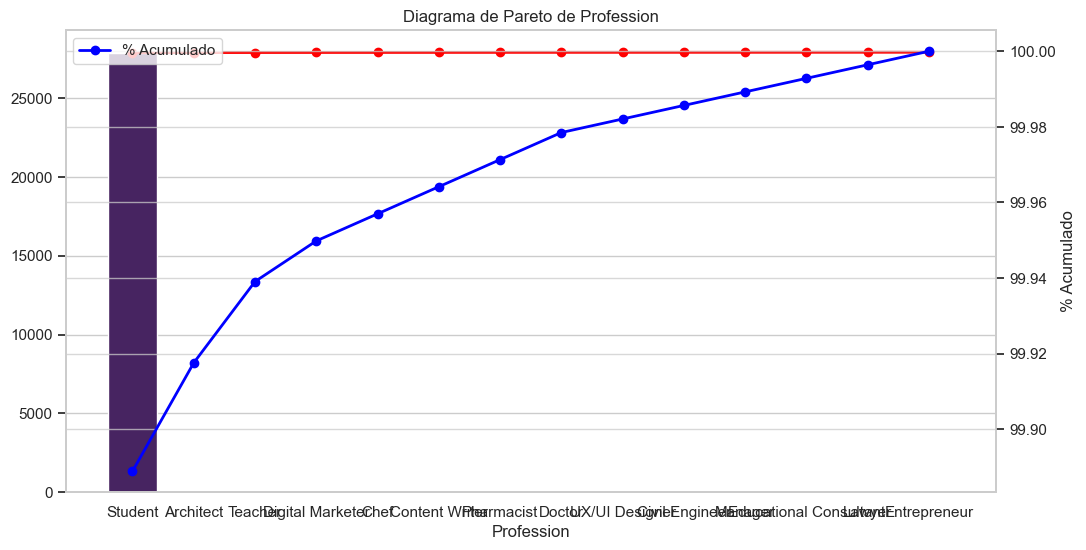

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\3991578648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


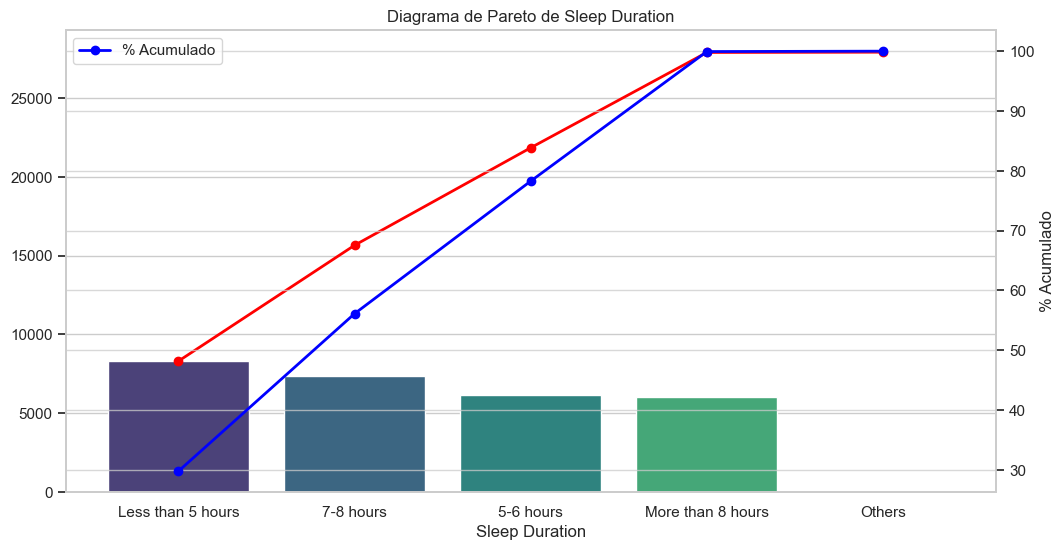

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\3991578648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


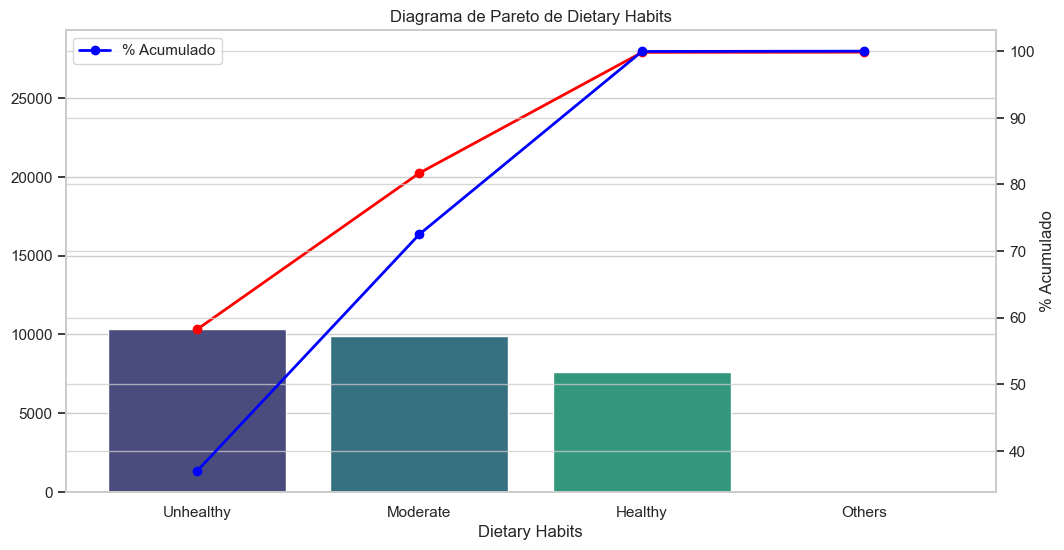

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\3991578648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


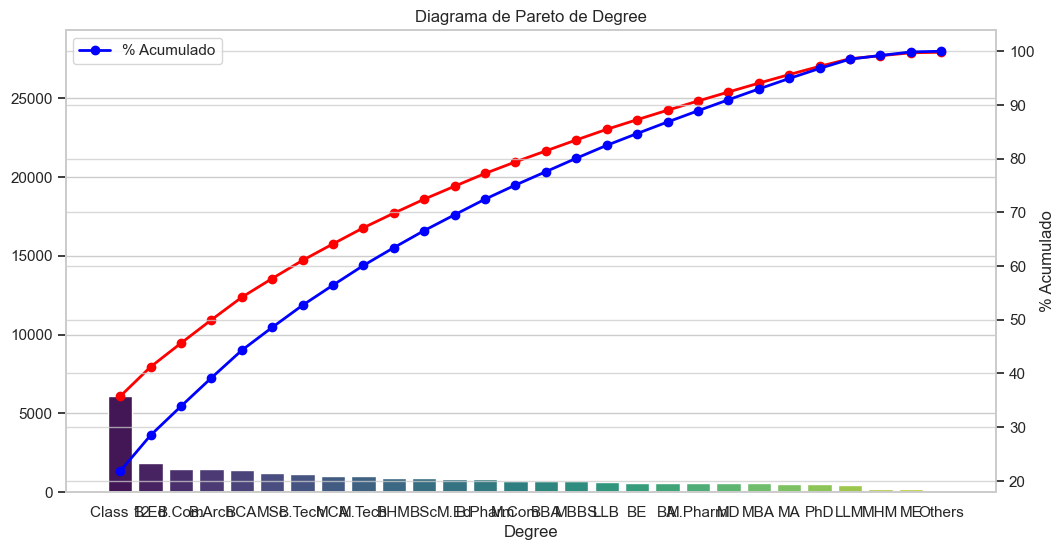

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\3991578648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


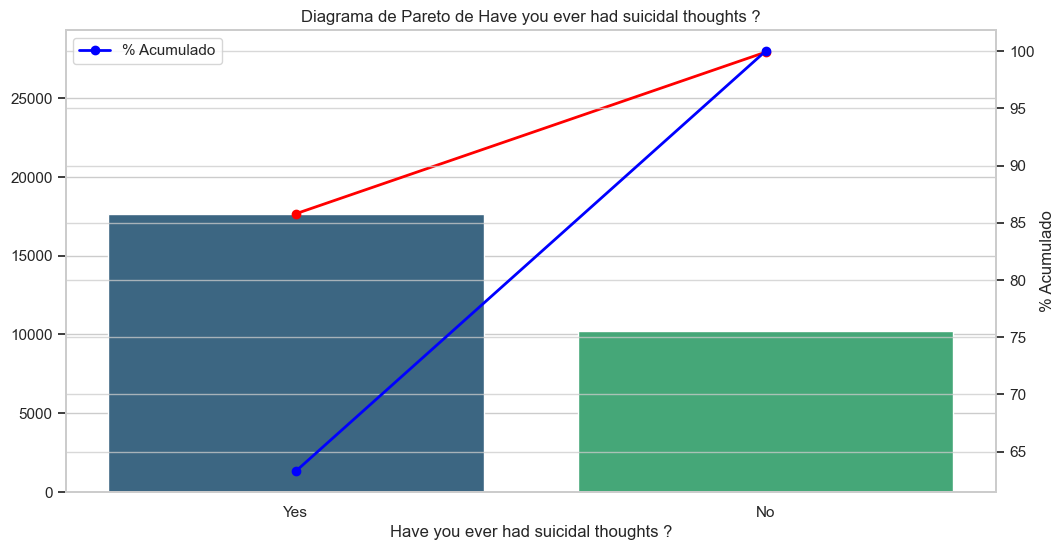

C:\Users\nuria\AppData\Local\Temp\ipykernel_6352\3991578648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')


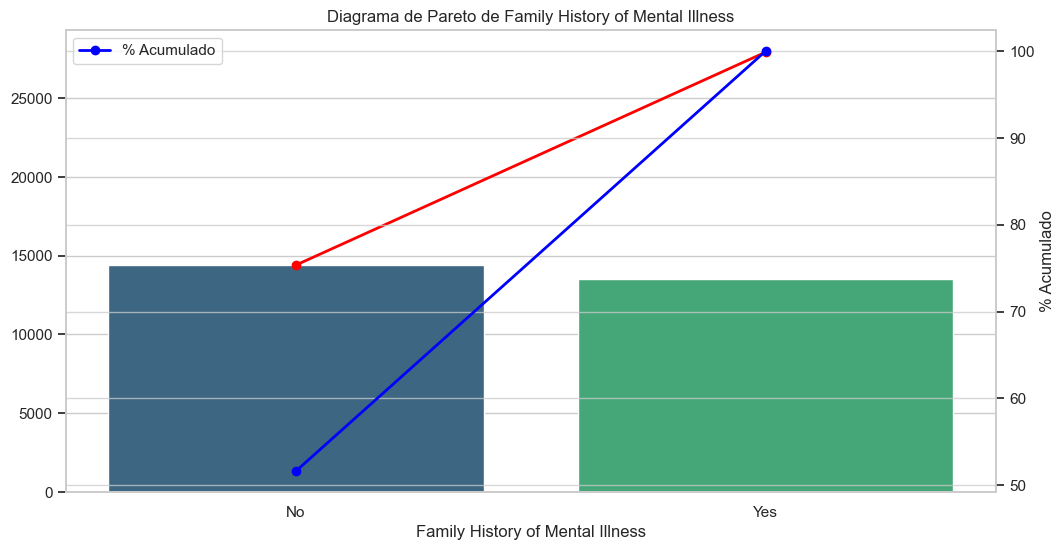

In [66]:
sns.set(style="whitegrid")

# Columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterar sobre las columnas categóricas y generar diagramas de Pareto
for column in categorical_columns:
    # Calcular frecuencias absolutas
    absolute_counts = df[column].value_counts()

    # Calcular frecuencias acumuladas
    cumulative_counts = absolute_counts.cumsum()
    cumulative_percentage = 100 * cumulative_counts / cumulative_counts.max()

    # Crear el gráfico
    plt.figure(figsize=(12, 6))

    # Gráfico de barras para frecuencias absolutas
    sns.barplot(x=absolute_counts.index, y=absolute_counts.values, palette='viridis')

    # Añadir la línea de frecuencia acumulada
    plt.plot(absolute_counts.index, cumulative_counts, color='red', marker='o', linewidth=2, label='Frecuencia Acumulada')
    
    # Añadir la línea de porcentaje acumulado
    ax2 = plt.gca().twinx()
    ax2.plot(absolute_counts.index, cumulative_percentage, color='blue', marker='o', linewidth=2, label='% Acumulado')

    # Configuración de ejes y títulos
    plt.title(f'Diagrama de Pareto de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia Absoluta')
    ax2.set_ylabel('% Acumulado')
    
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)

    # Añadir leyenda
    plt.legend(loc='upper left')

    plt.show()


## Analisis de cardinalidad

                                Variable  Cardinalidad
0                                 Gender             2
1                                   City            52
2                             Profession            14
3                         Sleep Duration             5
4                         Dietary Habits             4
5                                 Degree            28
6  Have you ever had suicidal thoughts ?             2
7       Family History of Mental Illness             2


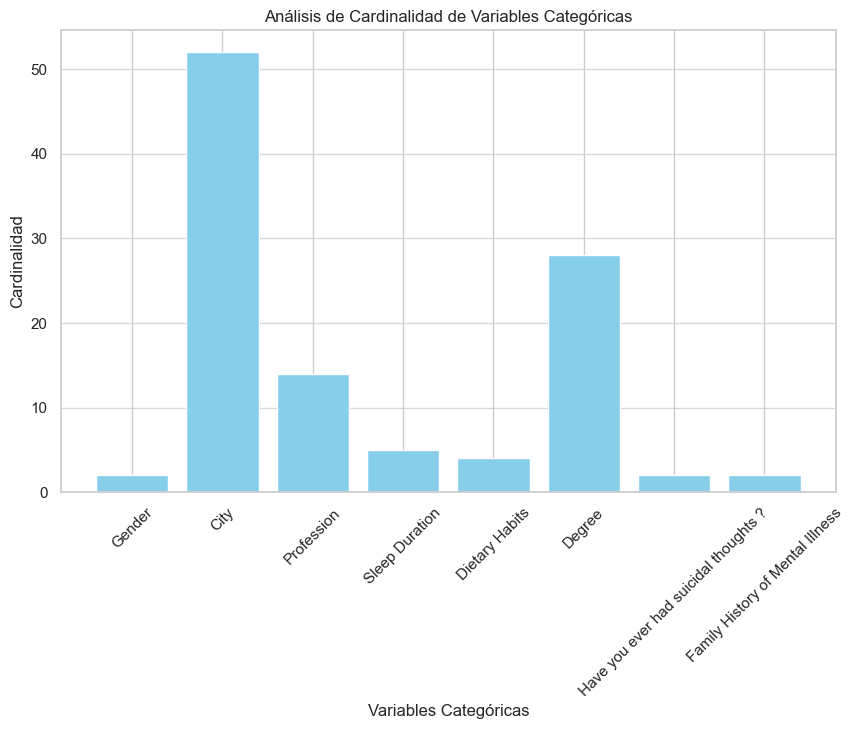

In [67]:
# Columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear un DataFrame para almacenar la cardinalidad
cardinality_df = pd.DataFrame({
    'Variable': categorical_columns,
    'Cardinalidad': [df[col].nunique() for col in categorical_columns]
})
print(cardinality_df)

# Grafico
plt.figure(figsize=(10, 6))
plt.bar(cardinality_df['Variable'], cardinality_df['Cardinalidad'], color='skyblue')
plt.title('Análisis de Cardinalidad de Variables Categóricas')
plt.xlabel('Variables Categóricas')
plt.ylabel('Cardinalidad')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


# 2. Análisis bivariado

1. Relaciones entre variables numéricas:
   * Matrices de correlación
   * Scatter plots
   * Heat maps

2. Relaciones entre variables categóricas:
   * Tablas de contingencia
   * Test Chi-cuadrado
   * Análisis de correspondencia

3. Relaciones numéricas-categóricas:
   * Box plots por grupo
   * Violin plots
   * ANOVA